<a href="https://colab.research.google.com/github/gab69/enfermedades/blob/main/enfermedad_visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# se realiza la importacion de las herramientas necesarias
!git clone https://github.com/ultralytics/yolov5  # clonamos la red neuronal pre entrenada yolov5
%cd yolov5
%pip install -qr requirements.txt  # install
%pip install -q roboflow

import cv2
import torch
import os
from IPython.display import Image, clear_output
from roboflow import Roboflow

# API Key
rf = Roboflow(api_key="T3BPQm6Za3uvMmeF8kt6", model_format="yolov5", notebook="ultralytics")



In [ ]:
os.environ["DATASET_DIRECTORY"]="/content/datasets"

In [ ]:
#descargamos la configuracion de roboflow
rf = Roboflow(api_key="T3BPQm6Za3uvMmeF8kt6")
project = rf.workspace("gab").project("enfermedades_visuales")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/datasets/enfermedades_visuales-1 in yolov5pytorch:: 100%|██████████| 811/811 [00:00<00:00, 7791.46it/s]


In [ ]:
#realizamos el entrenamiento de nuestra red neuronal con las caracteristicas: tamaño de imagen 416px, batch 16 y epoch 100
!python train.py --img 416 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

2024-01-17 23:33:49.646011: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-17 23:33:49.646094: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-17 23:33:49.647650: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/datasets/enfermedades_visuales-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, 

In [ ]:
#realizamos la validacion de de nuestra red entrenada con las 20 imagenes restantes
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.2 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/enfermedades_visuales-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-277-g703d37e Python-3.10.12 torch-2.1.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/20 /content/datasets/enfermedades_visuales-1/test/images/c-5-_jpg.rf.23029400fad9f906df0c928967cfd4ea.jpg: 416x416 2 cataratas, 178.0ms
image 2/20 /content/datasets/enfermedades_visuales-1/test/images/c-74-_jpg.rf.8e7b1c300d12f23d4511b97a263f9a54.jpg: 416x416 1 catarata, 180.6ms
image 3/20 /content/datasets/enfe

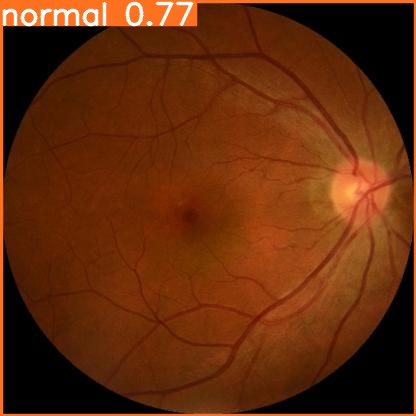

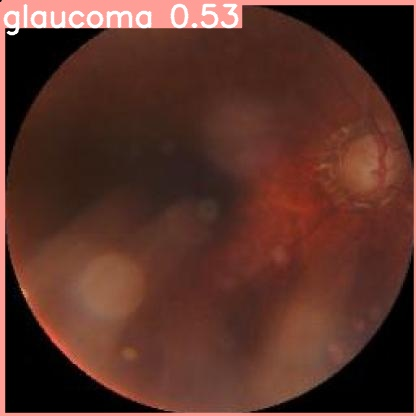

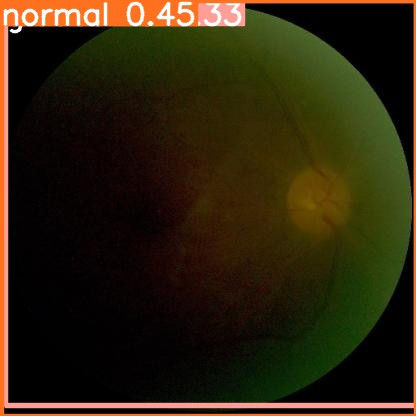

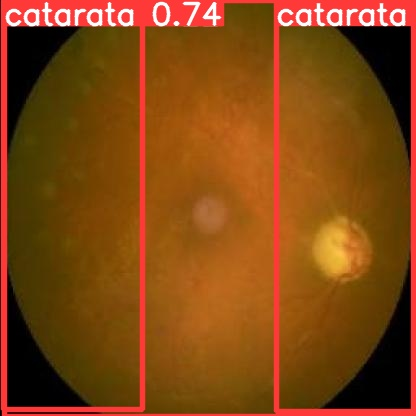

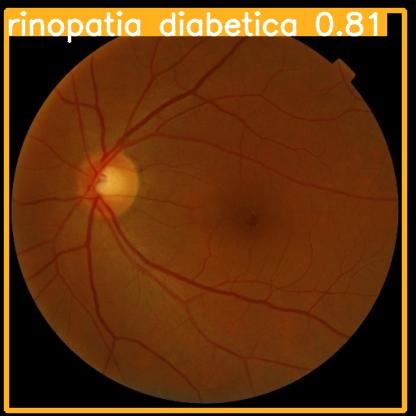

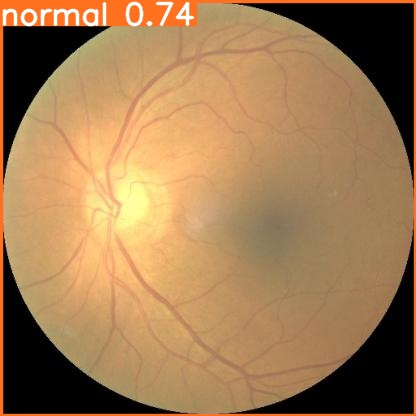

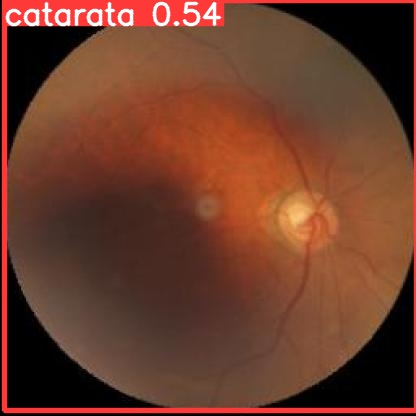

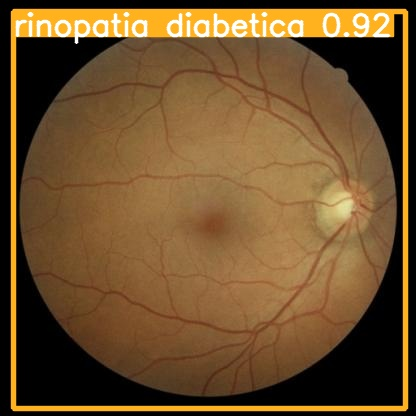

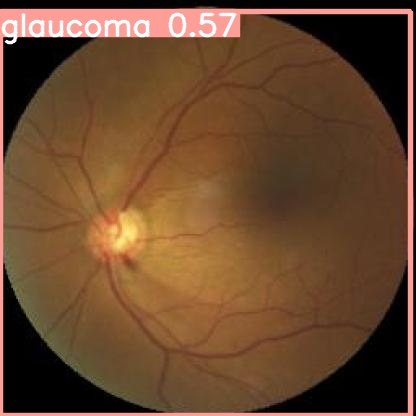

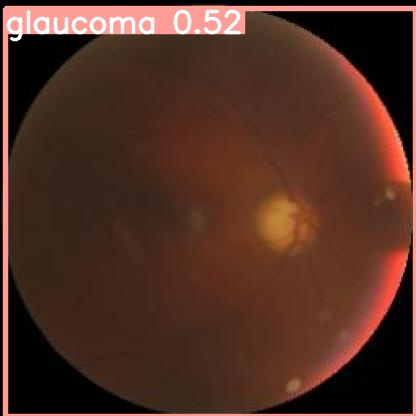

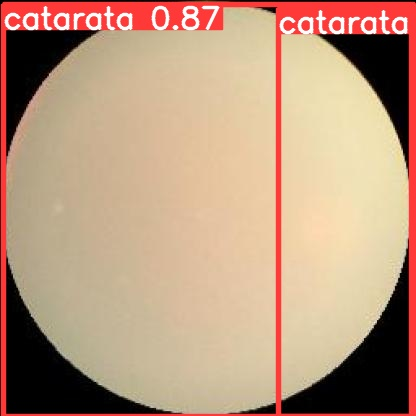

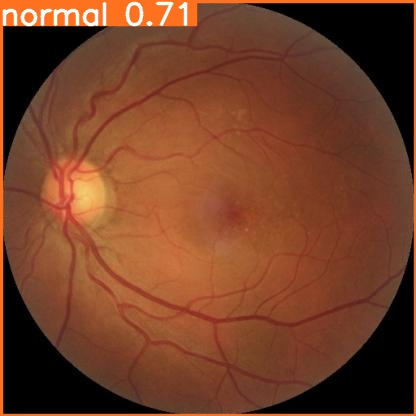

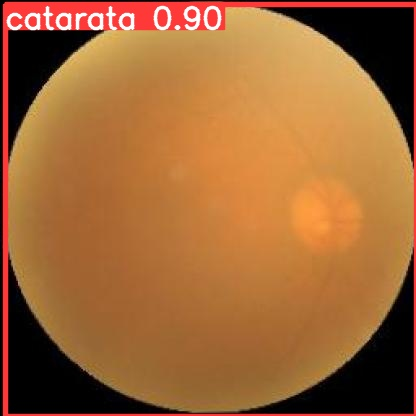

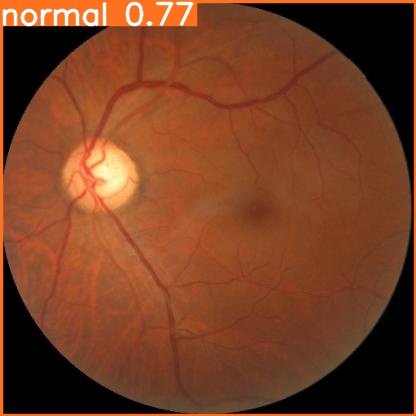

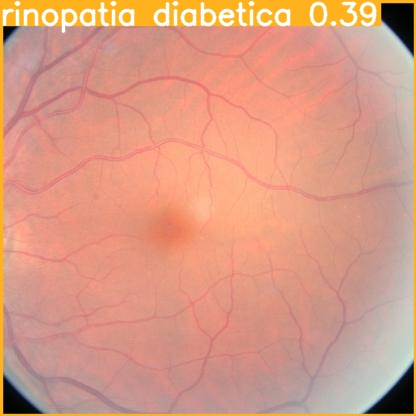

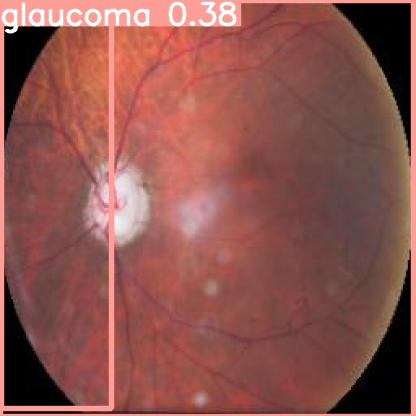

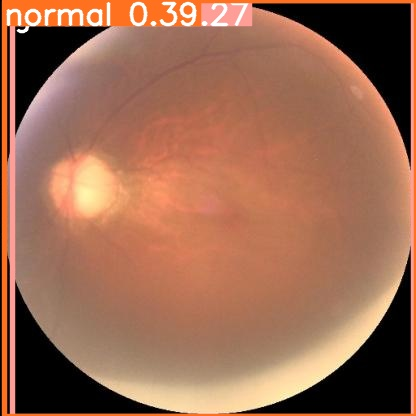

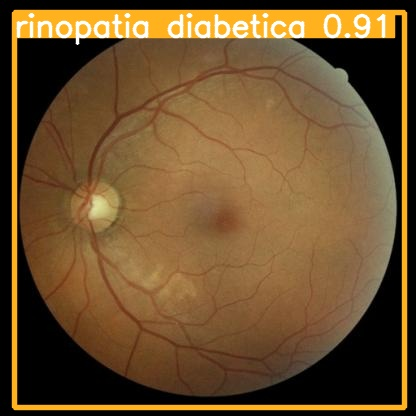

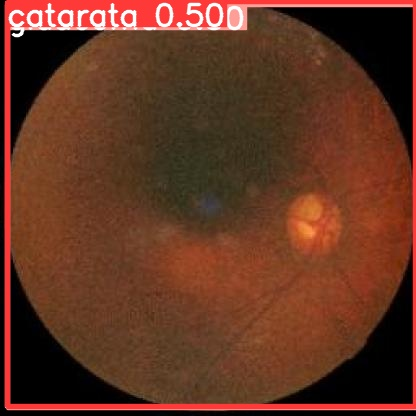

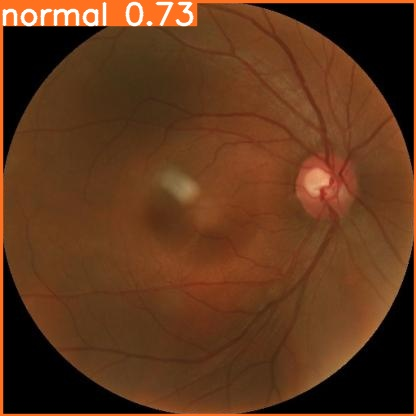

In [ ]:
#realizamos la visualizacion de las 20 imagenes
import glob
from IPython.display import Image, display
i=0
j=0
for imageName in glob.glob("runs/detect/exp/*.jpg"):
  i+=1
  if i < 20:
    display(Image(filename = imageName))
    print("\n")

In [ ]:
#ahora verificamos nuestra red neuronal aplicando a un diferente dataset con tamaño de 416px y 0.2 de aceptacion, para verificar cualquier data set debe tener la misma caracteristicas y cambiar la ruta prueba
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.2 --source prueba --exist-ok

detect: weights=['runs/train/exp/weights/best.pt'], source=prueba, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-277-g703d37e Python-3.10.12 torch-2.1.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/417 /content/yolov5/prueba/1000_left.jpg: 320x416 1 rinopatia diabetica, 222.2ms
image 2/417 /content/yolov5/prueba/1000_right.jpg: 320x416 1 normal, 131.8ms
image 3/417 /content/yolov5/prueba/1001_left.jpg: 288x416 1 rinopatia diabetica, 125.6ms
image 4/417 /content/yolov5/prueba/1001_right.jpg: 288x416 1 rinopatia diabetica, 110.5ms
image 5/417 /content/yol

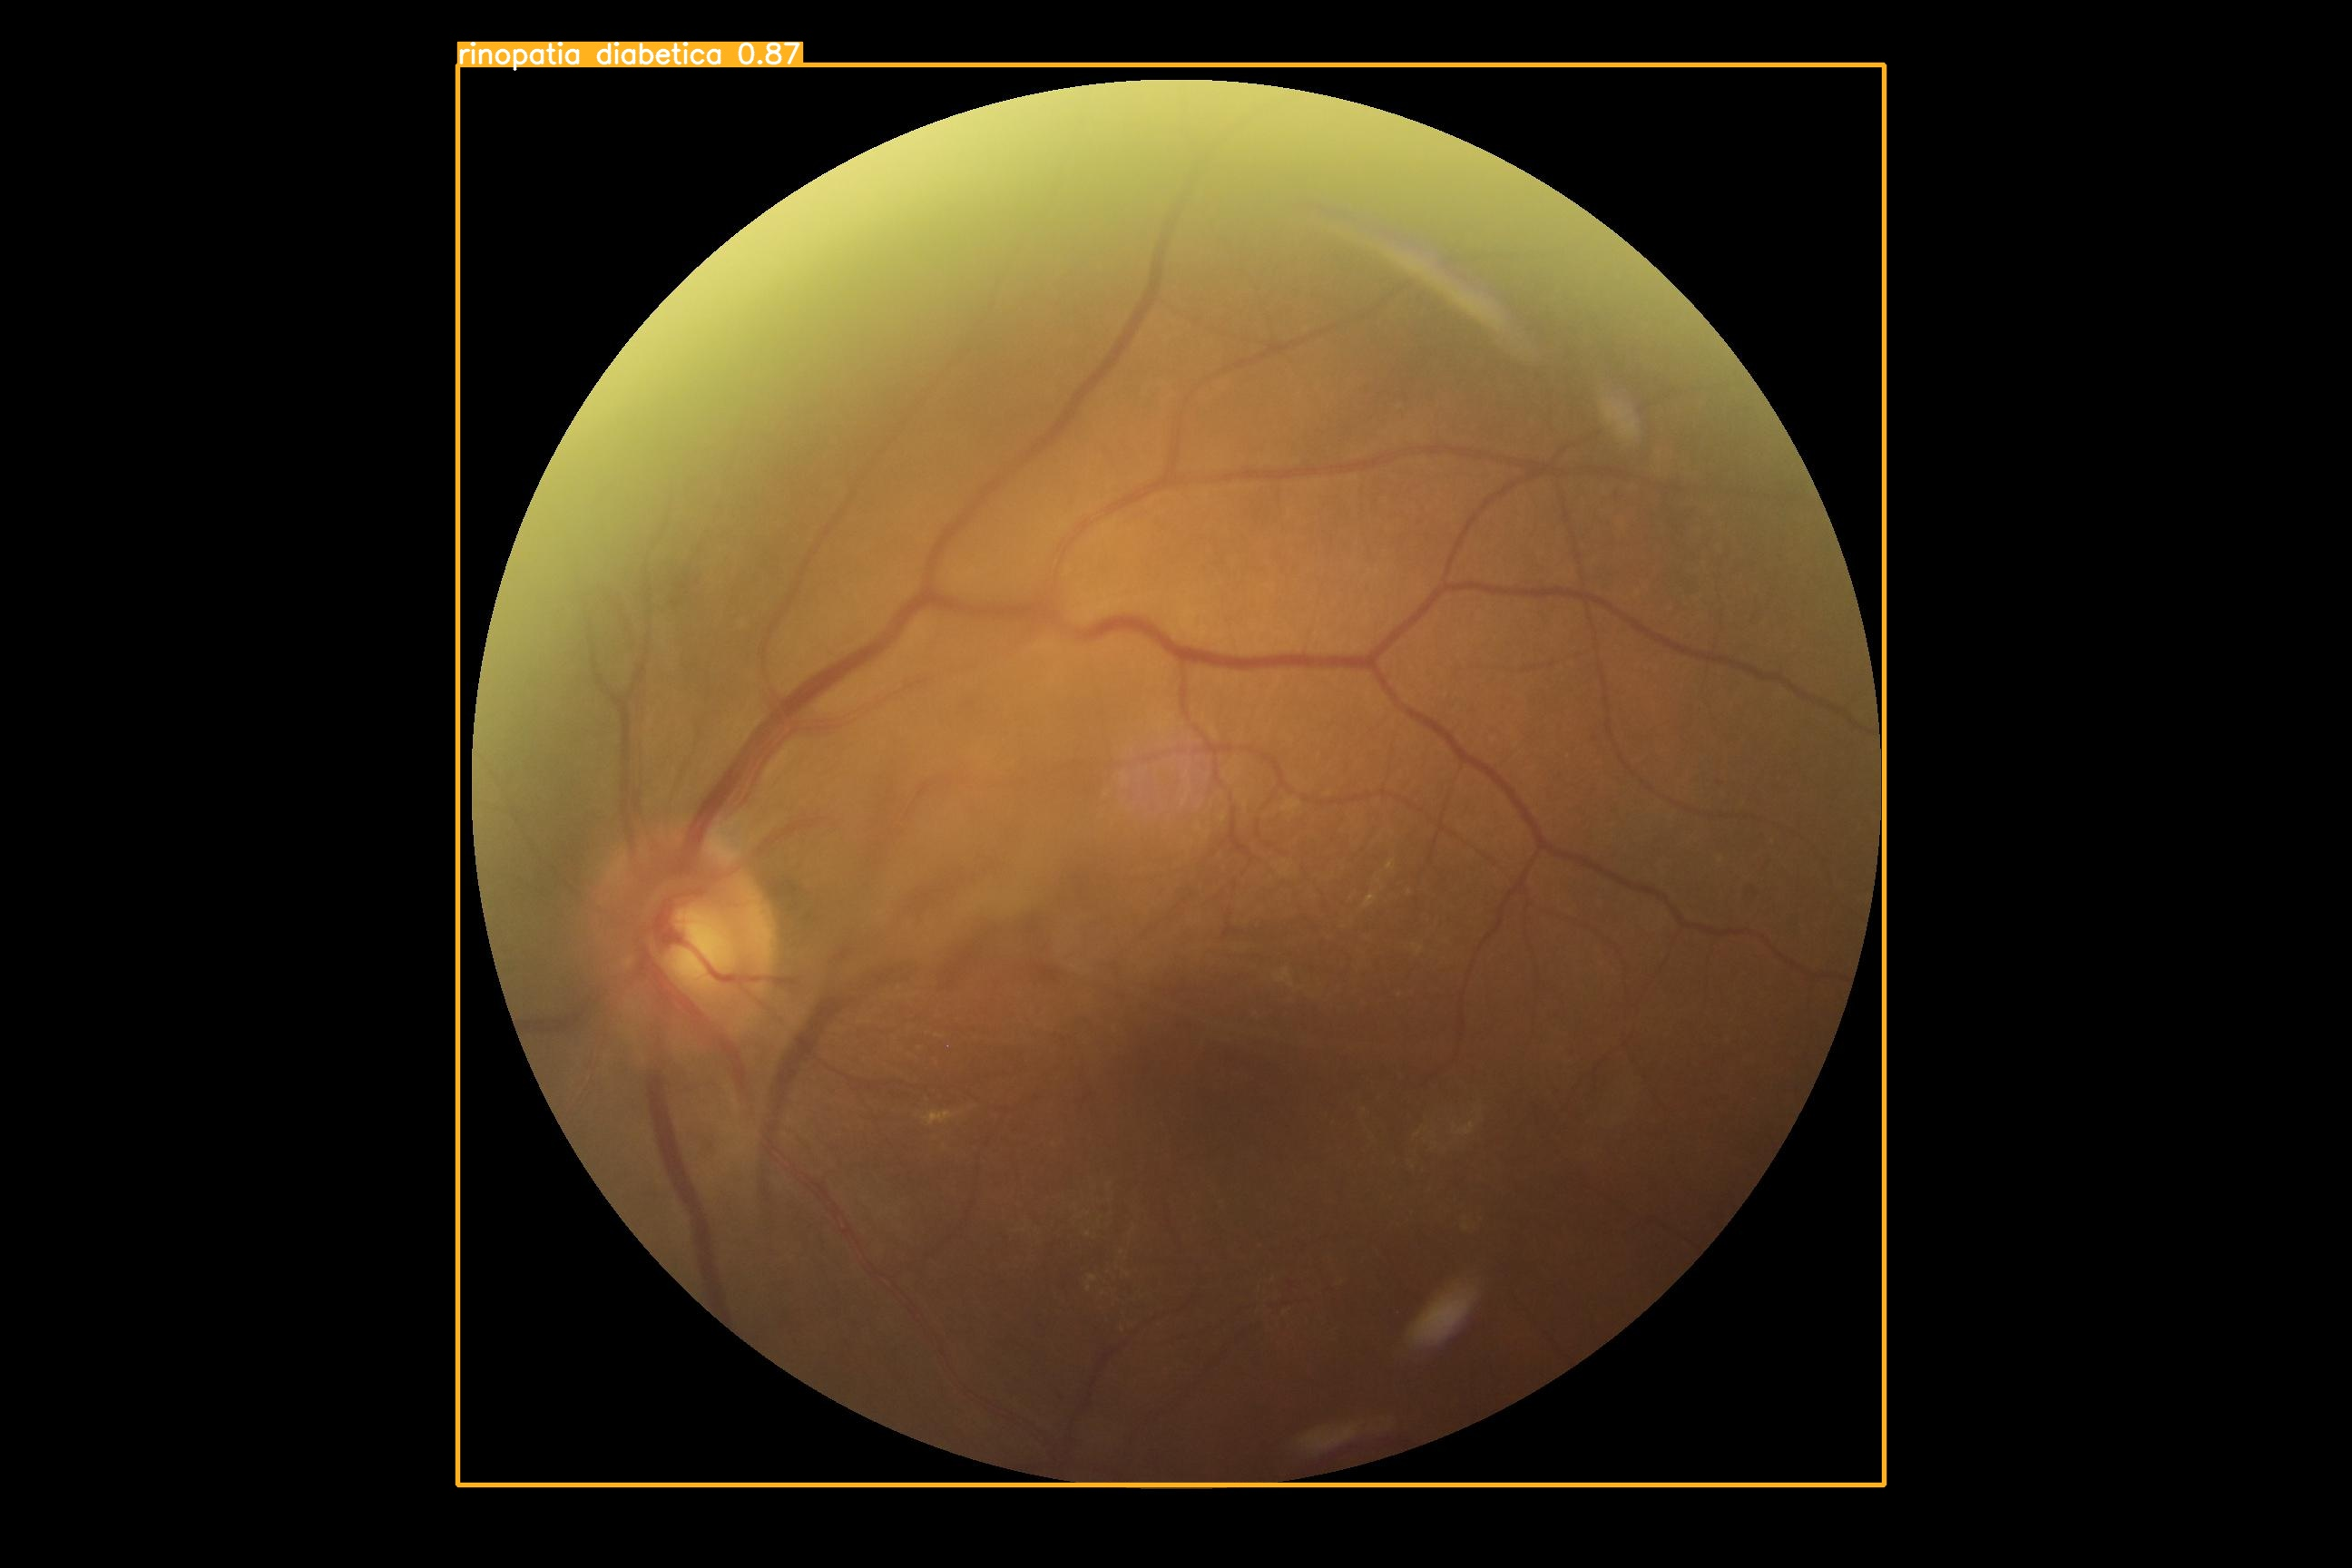

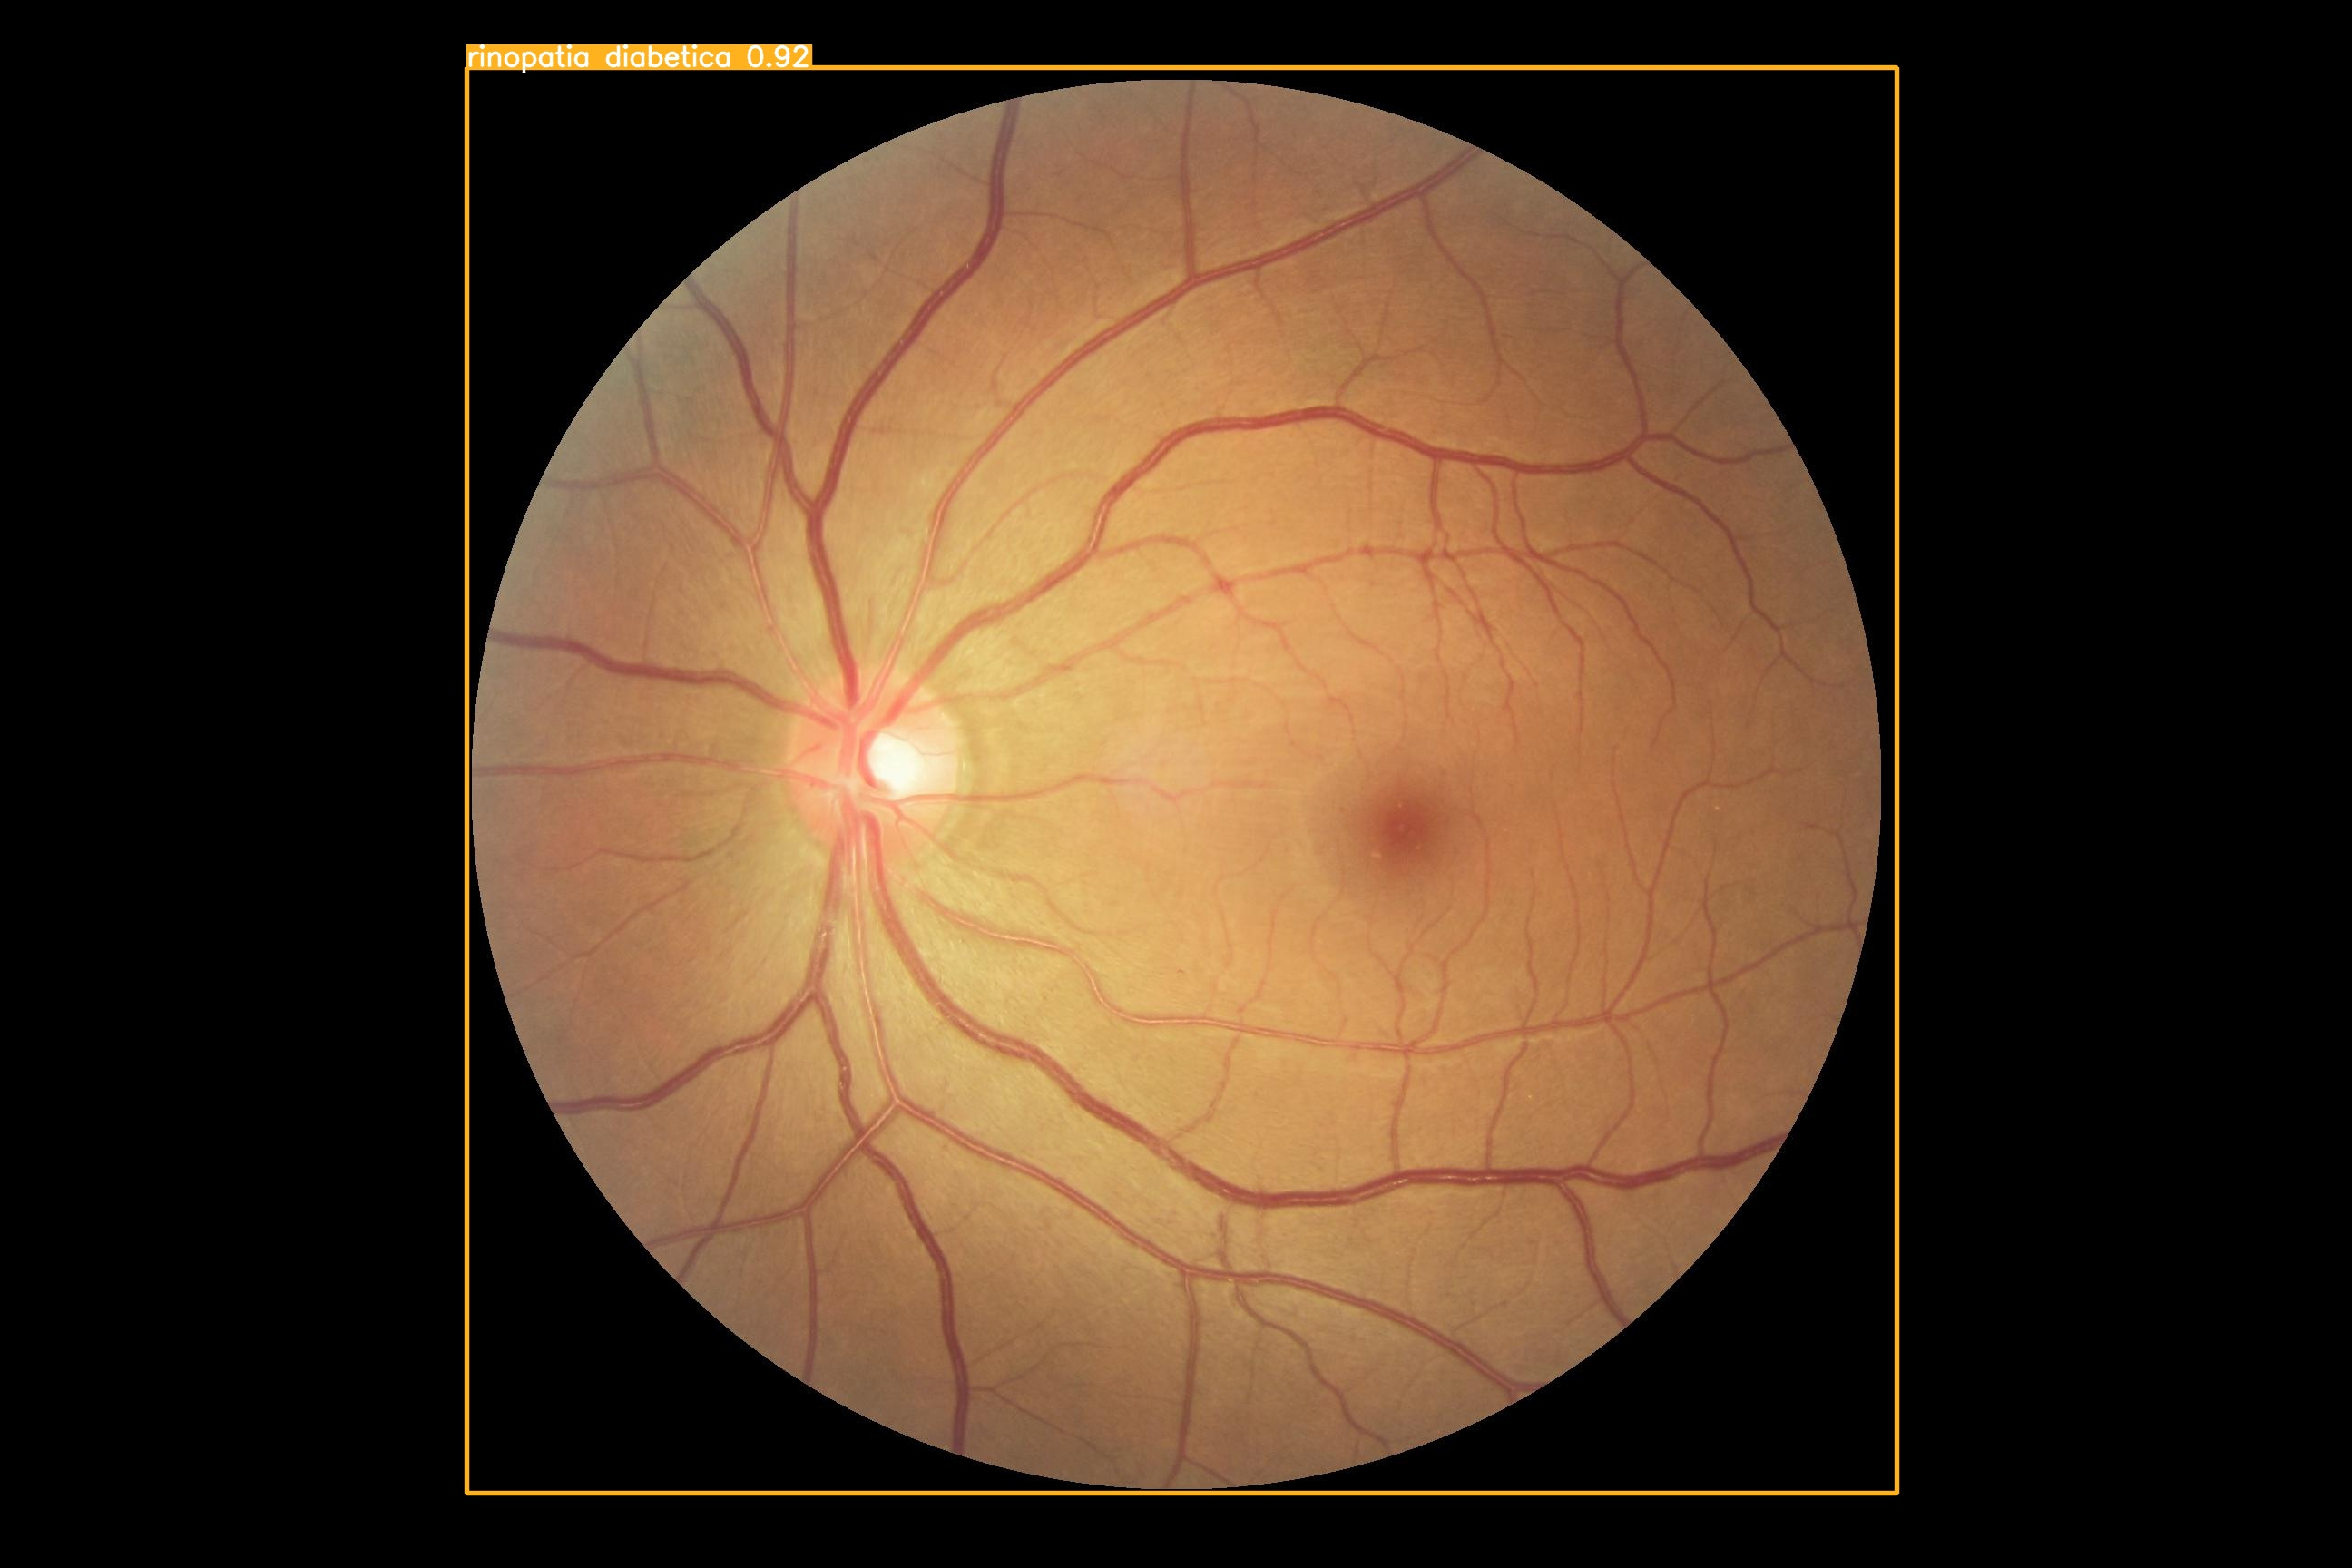

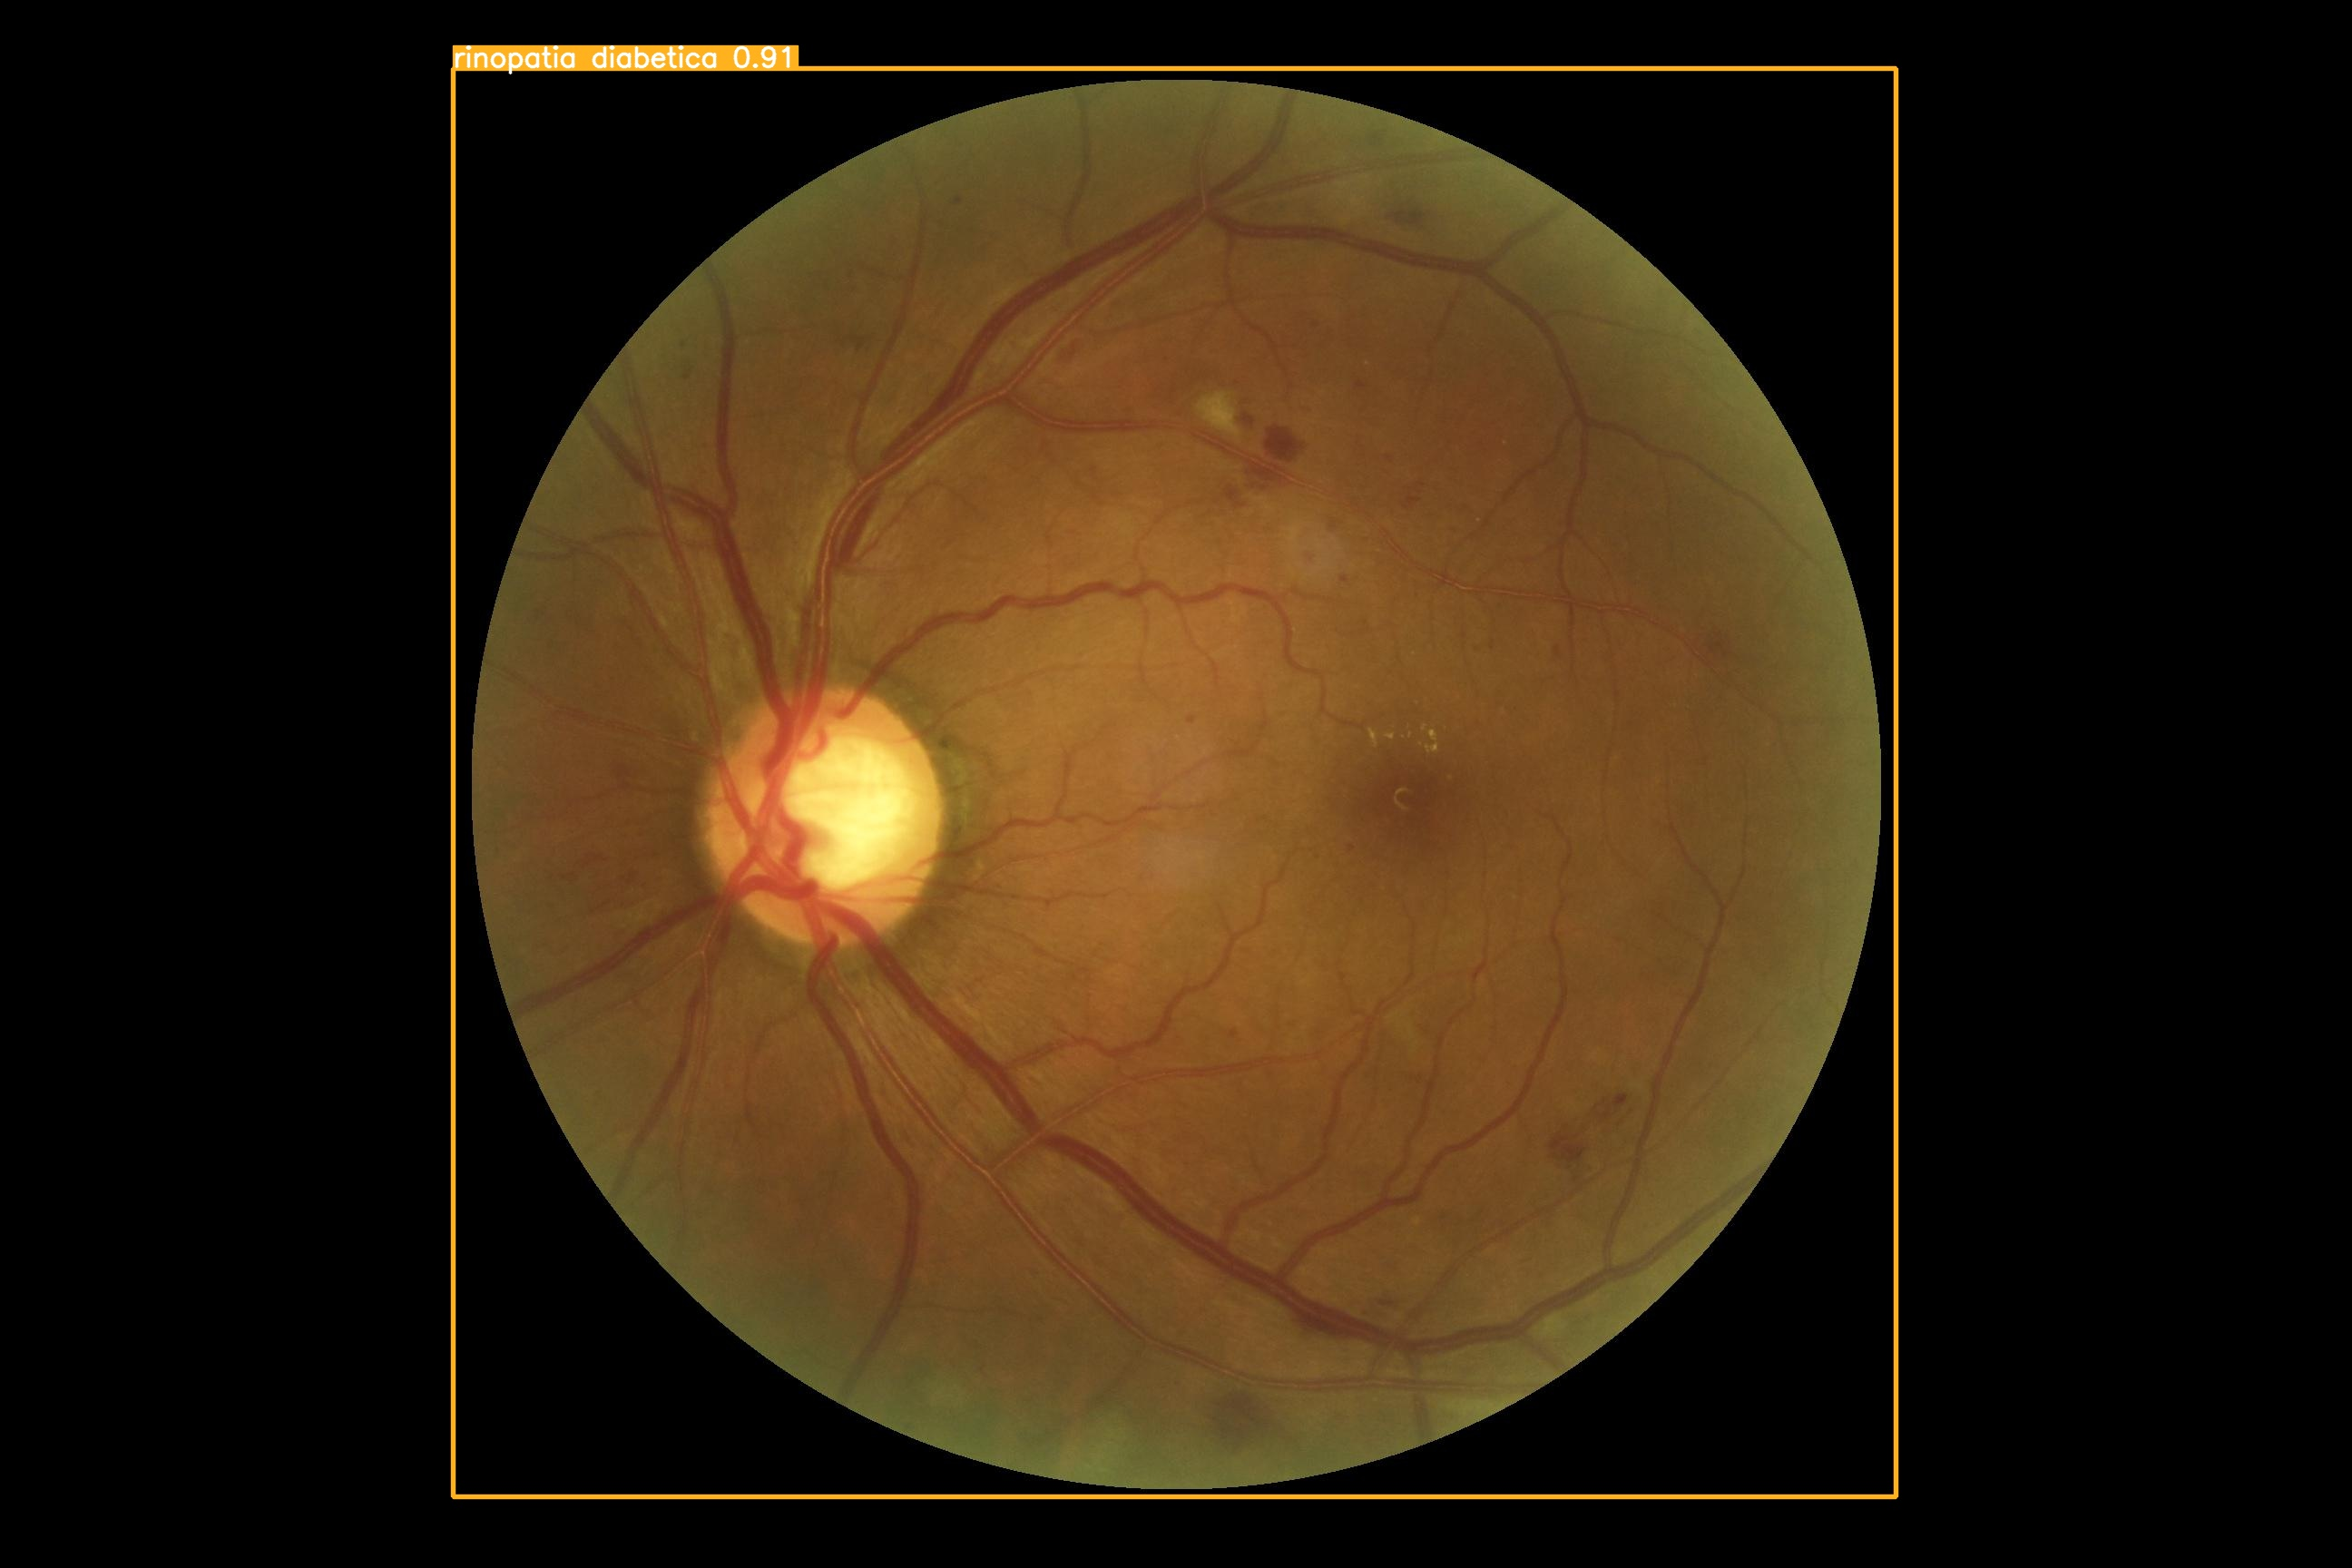

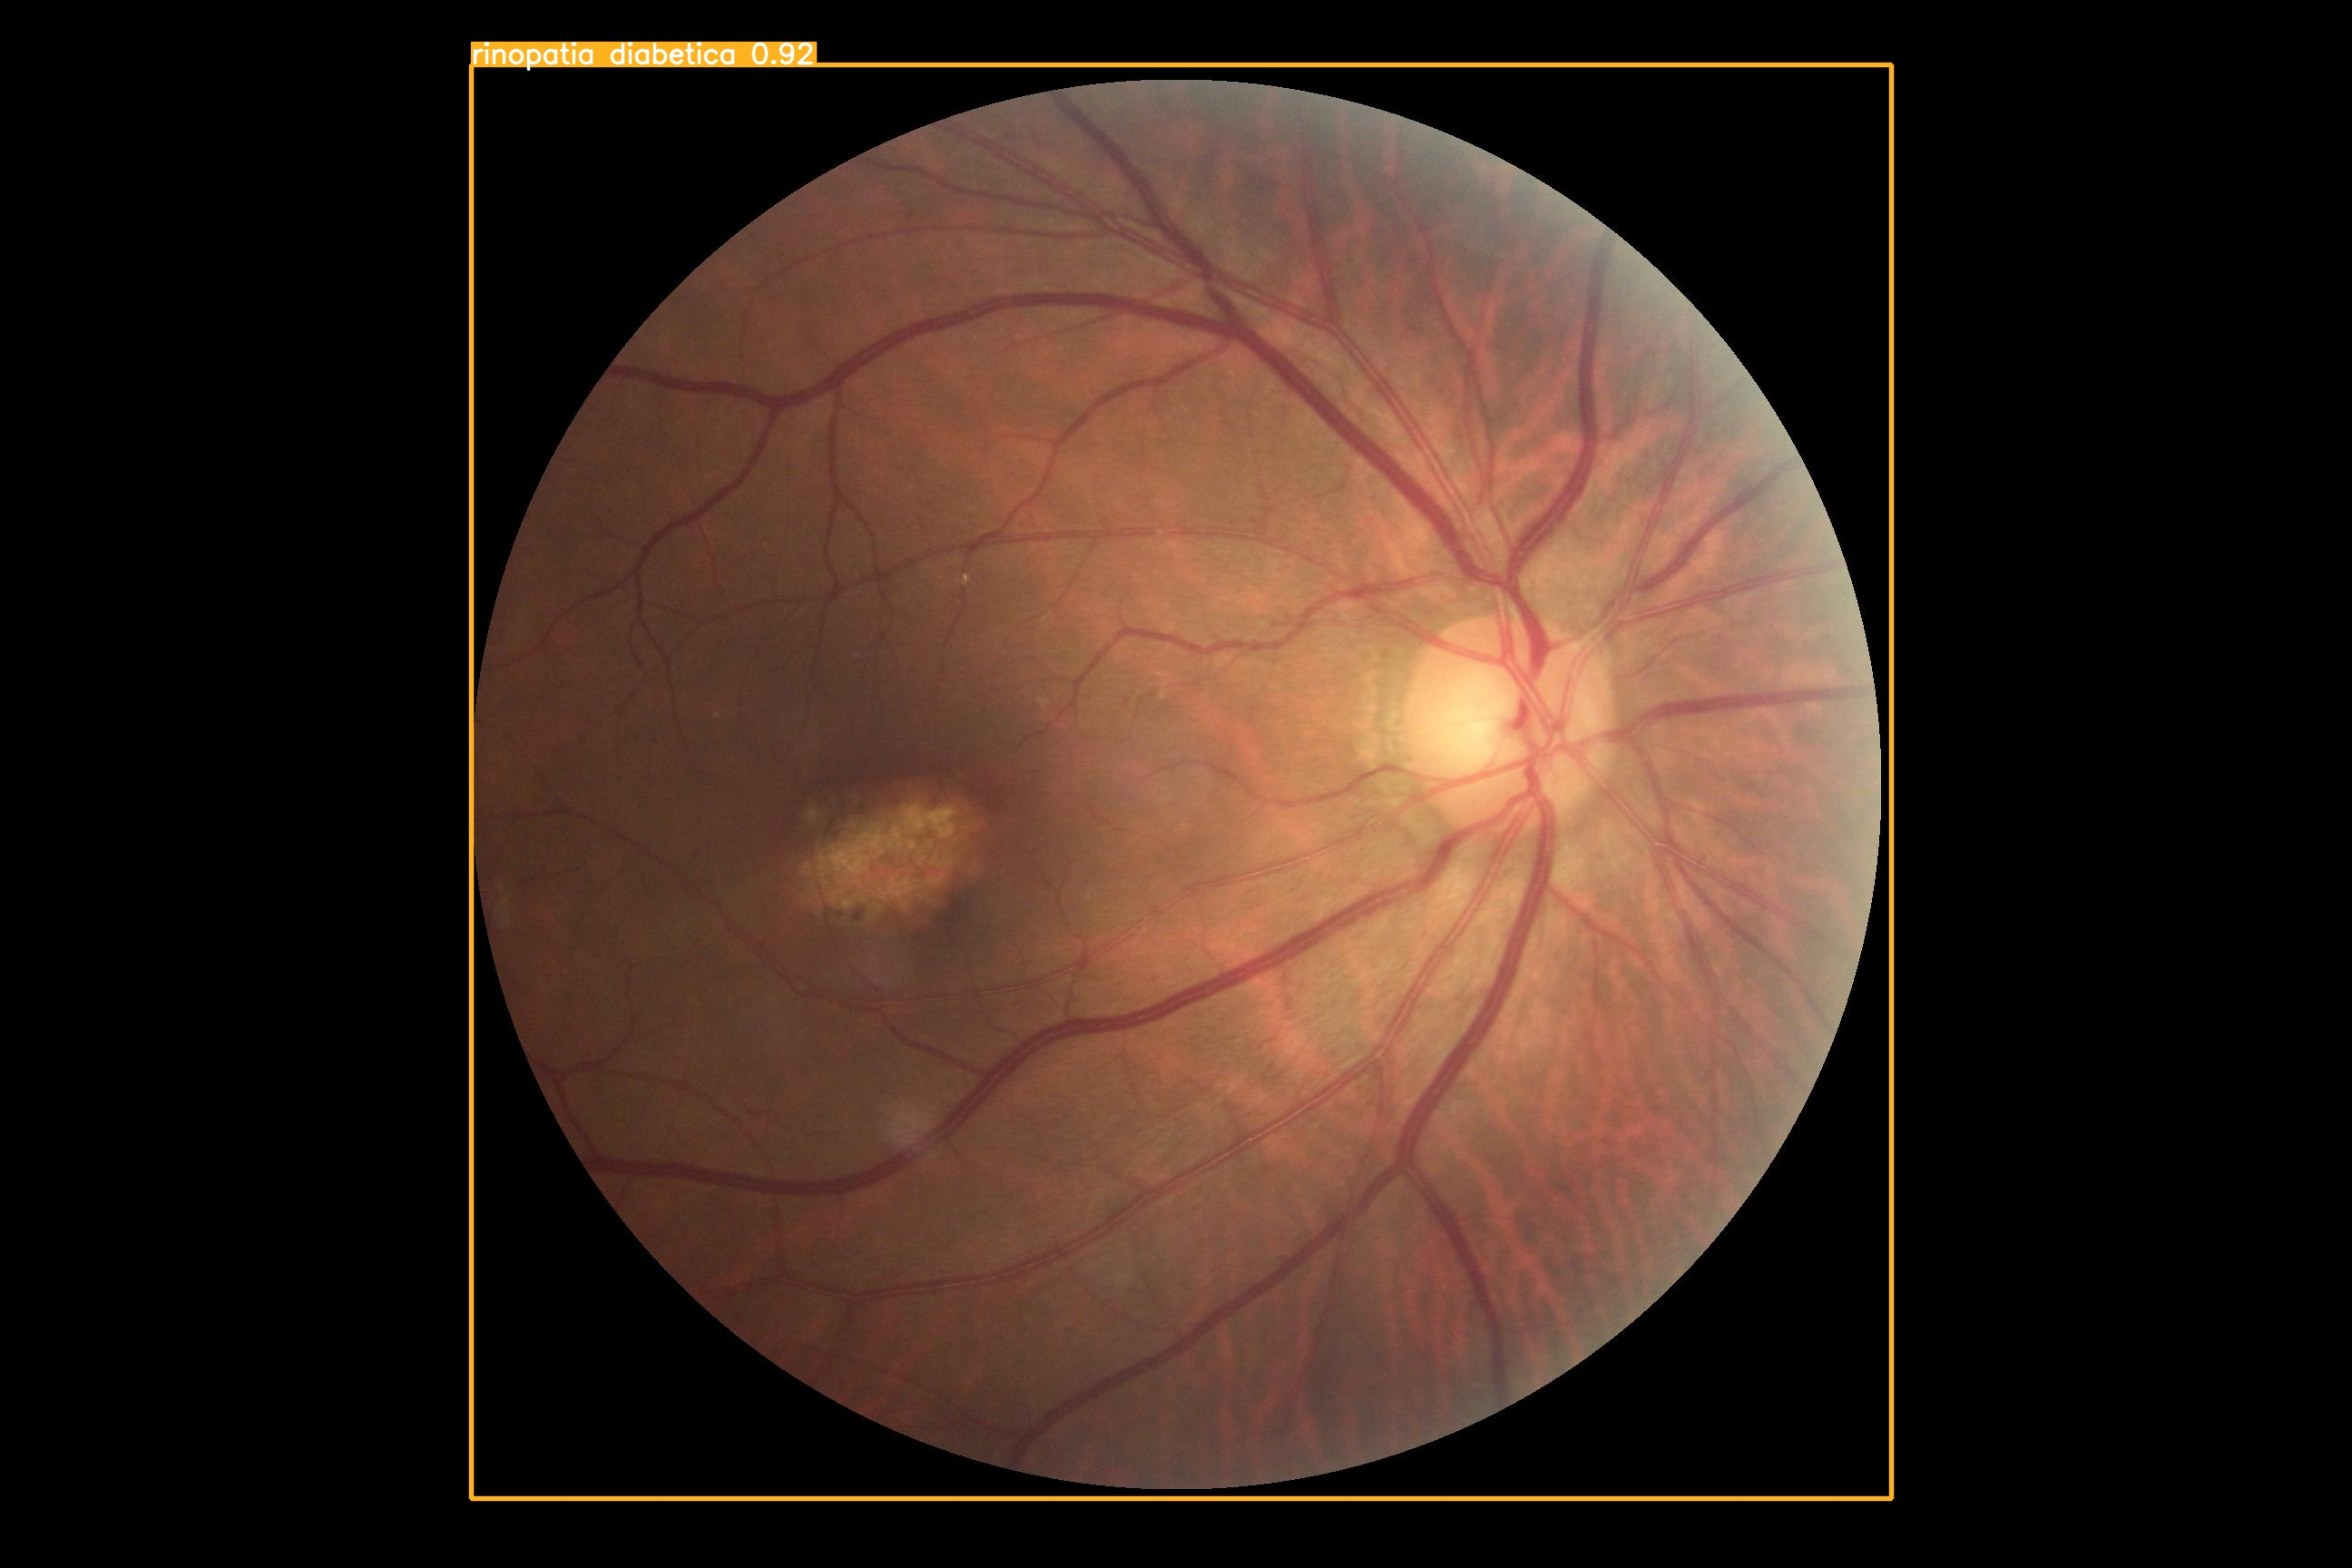

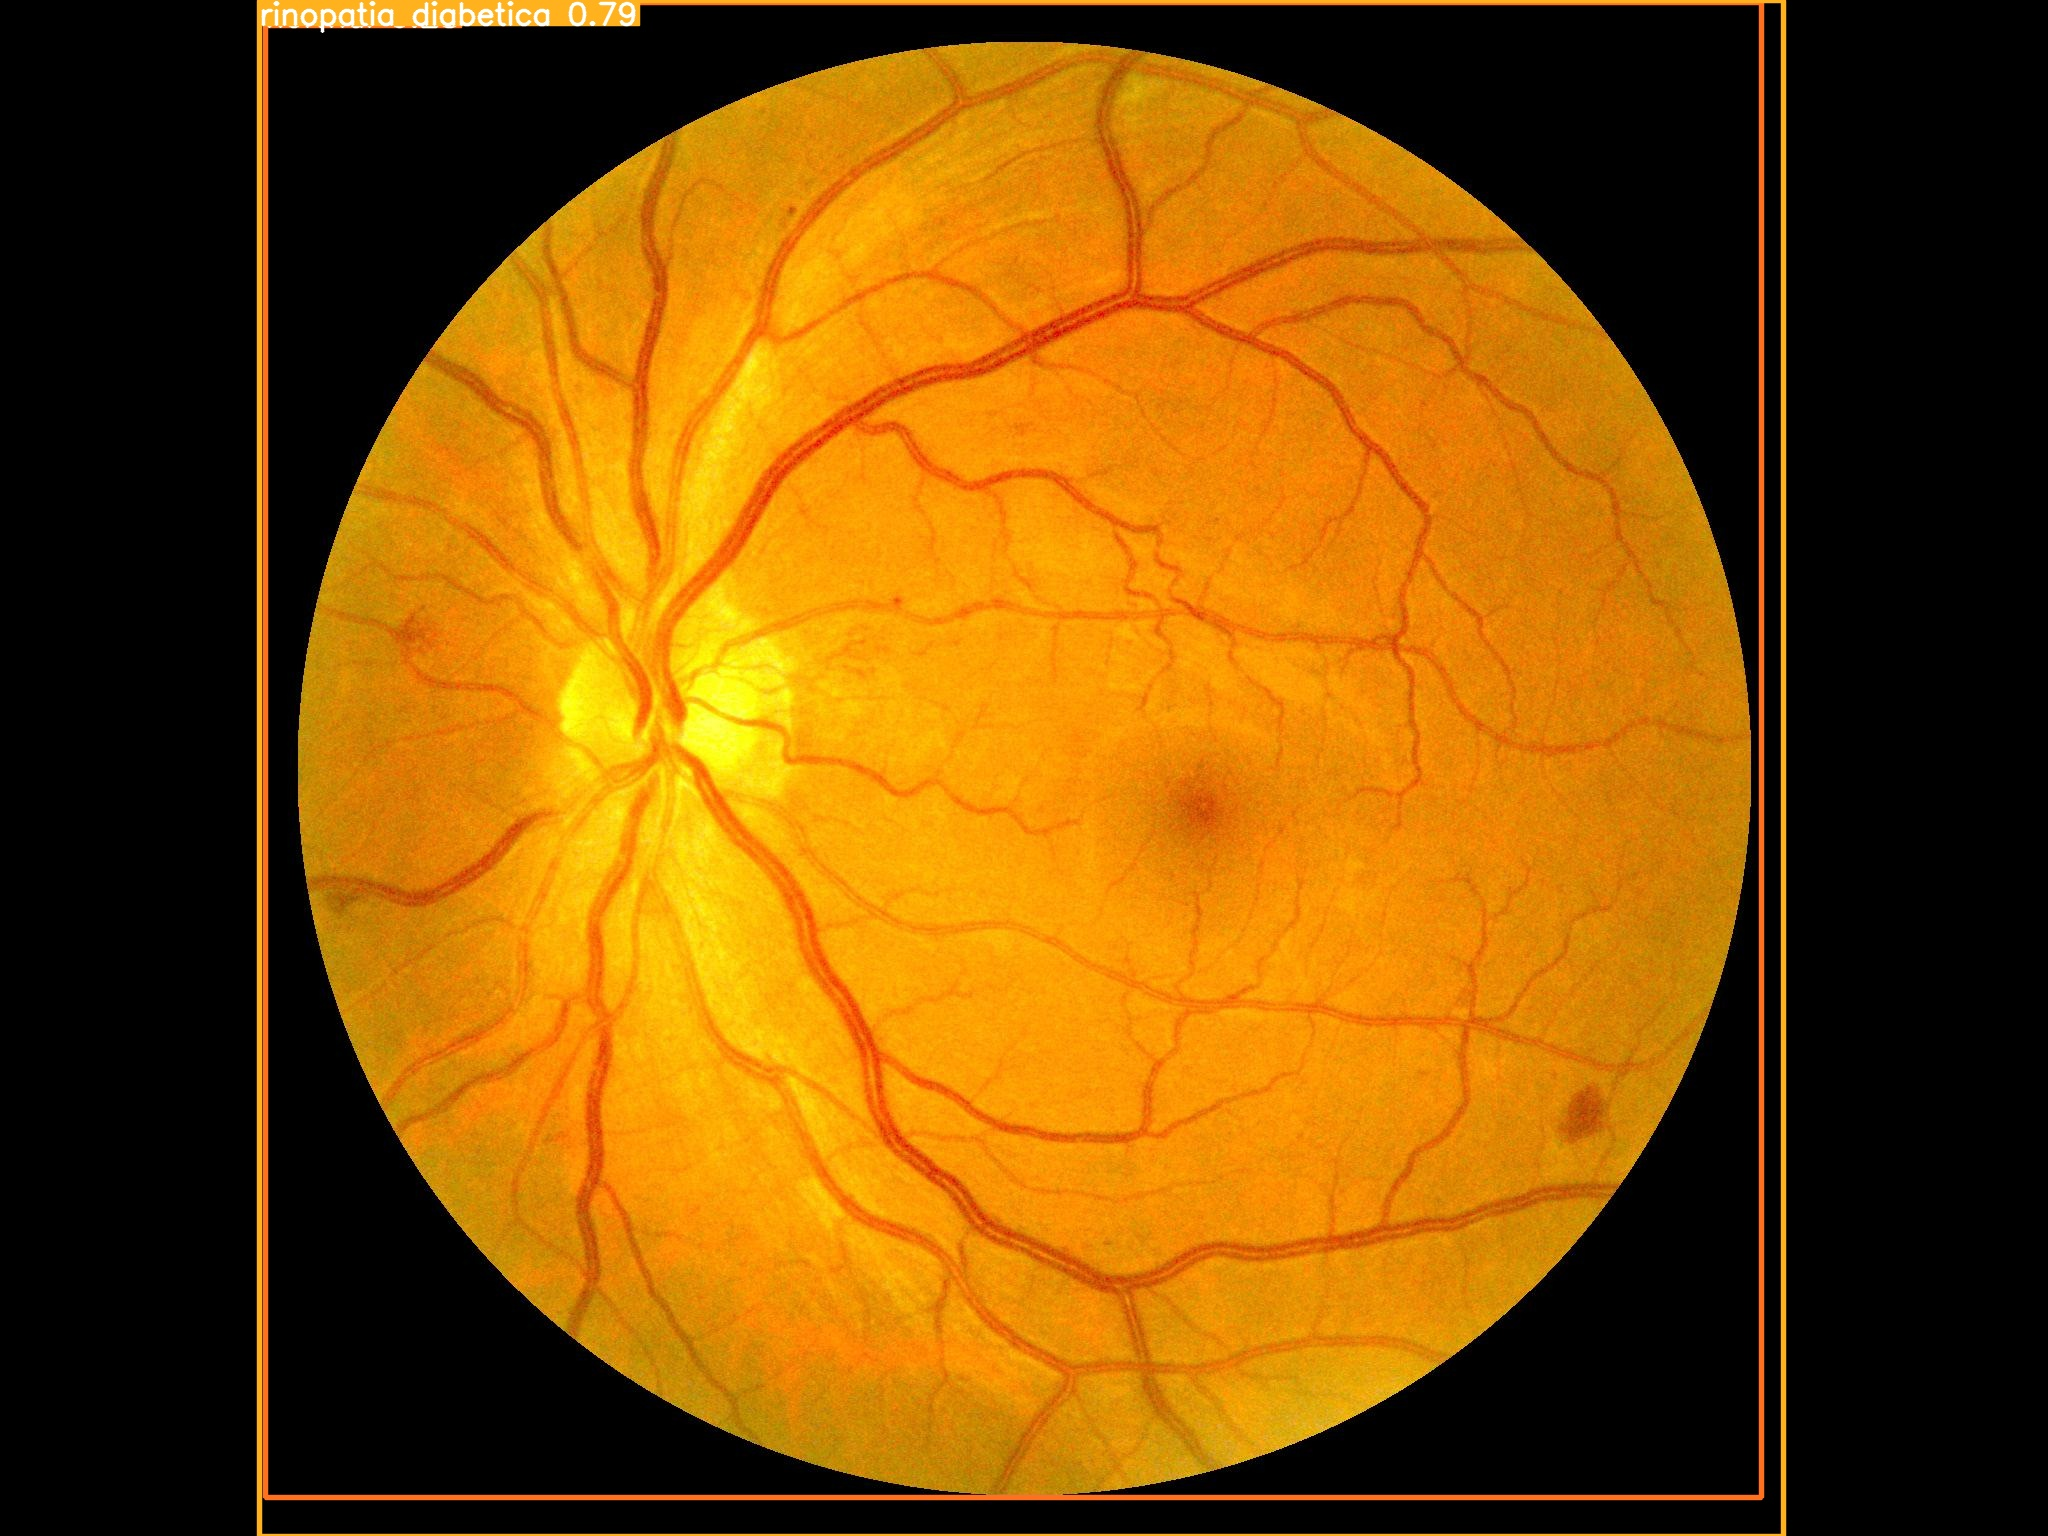

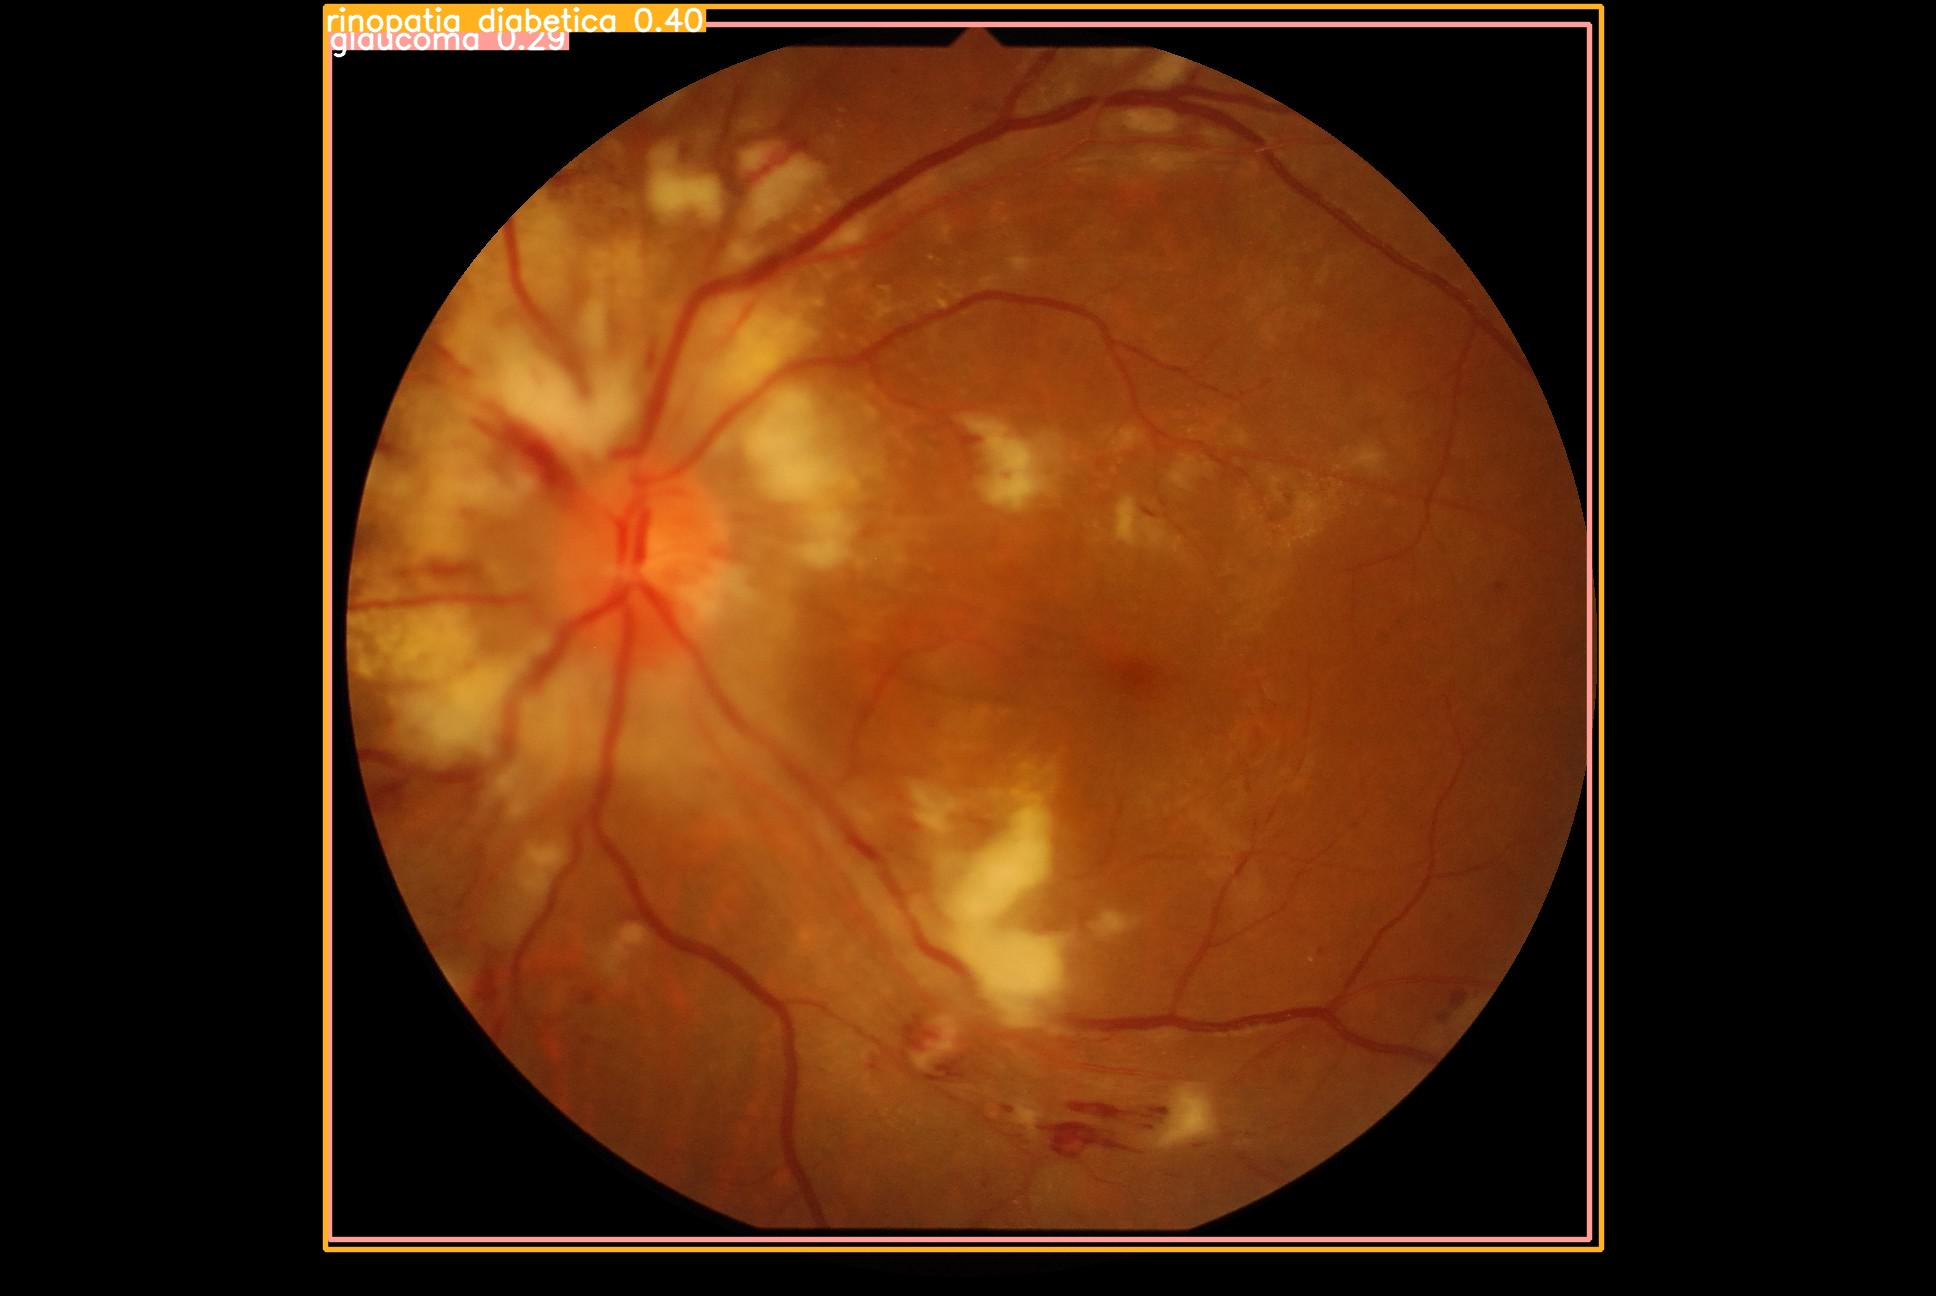

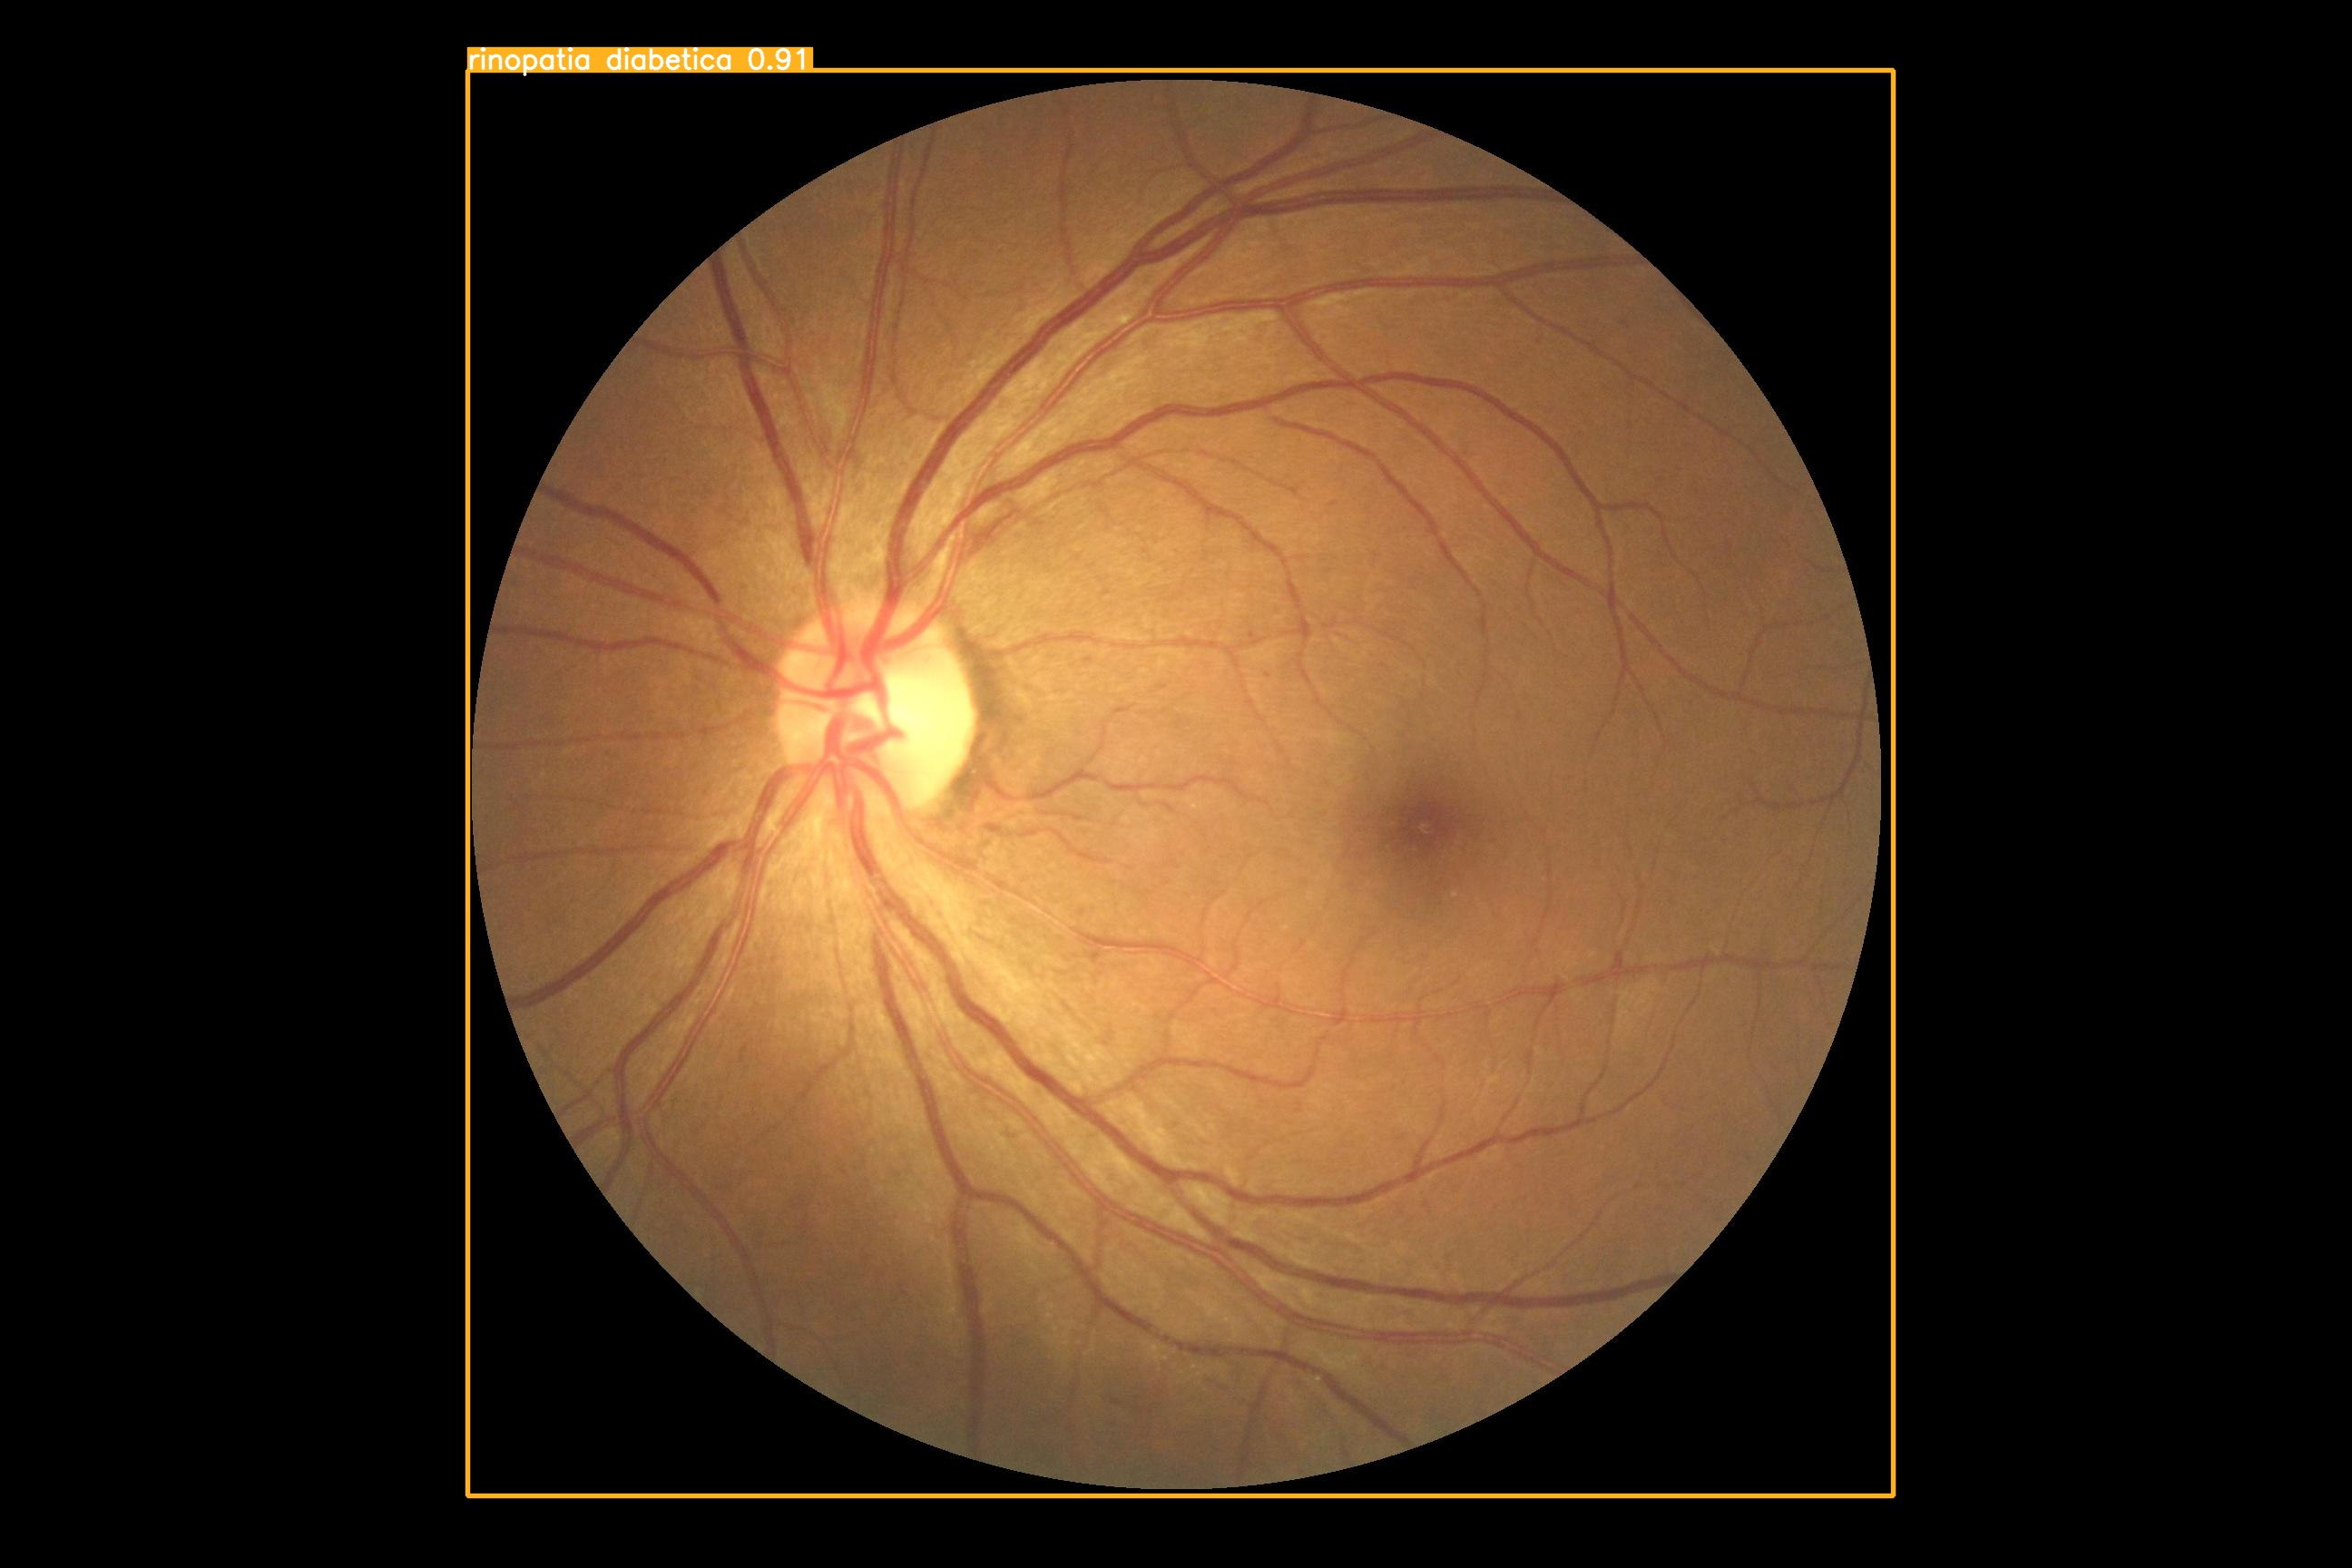

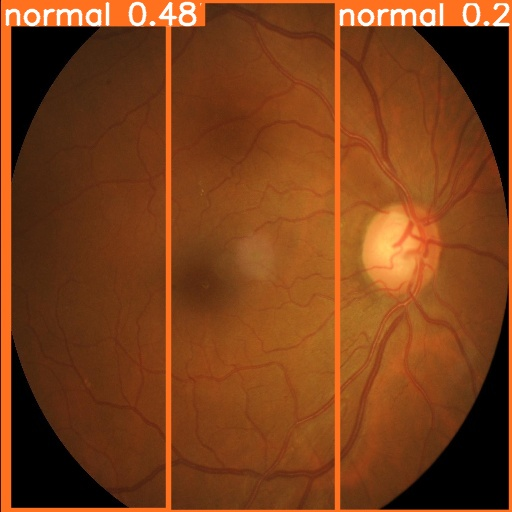

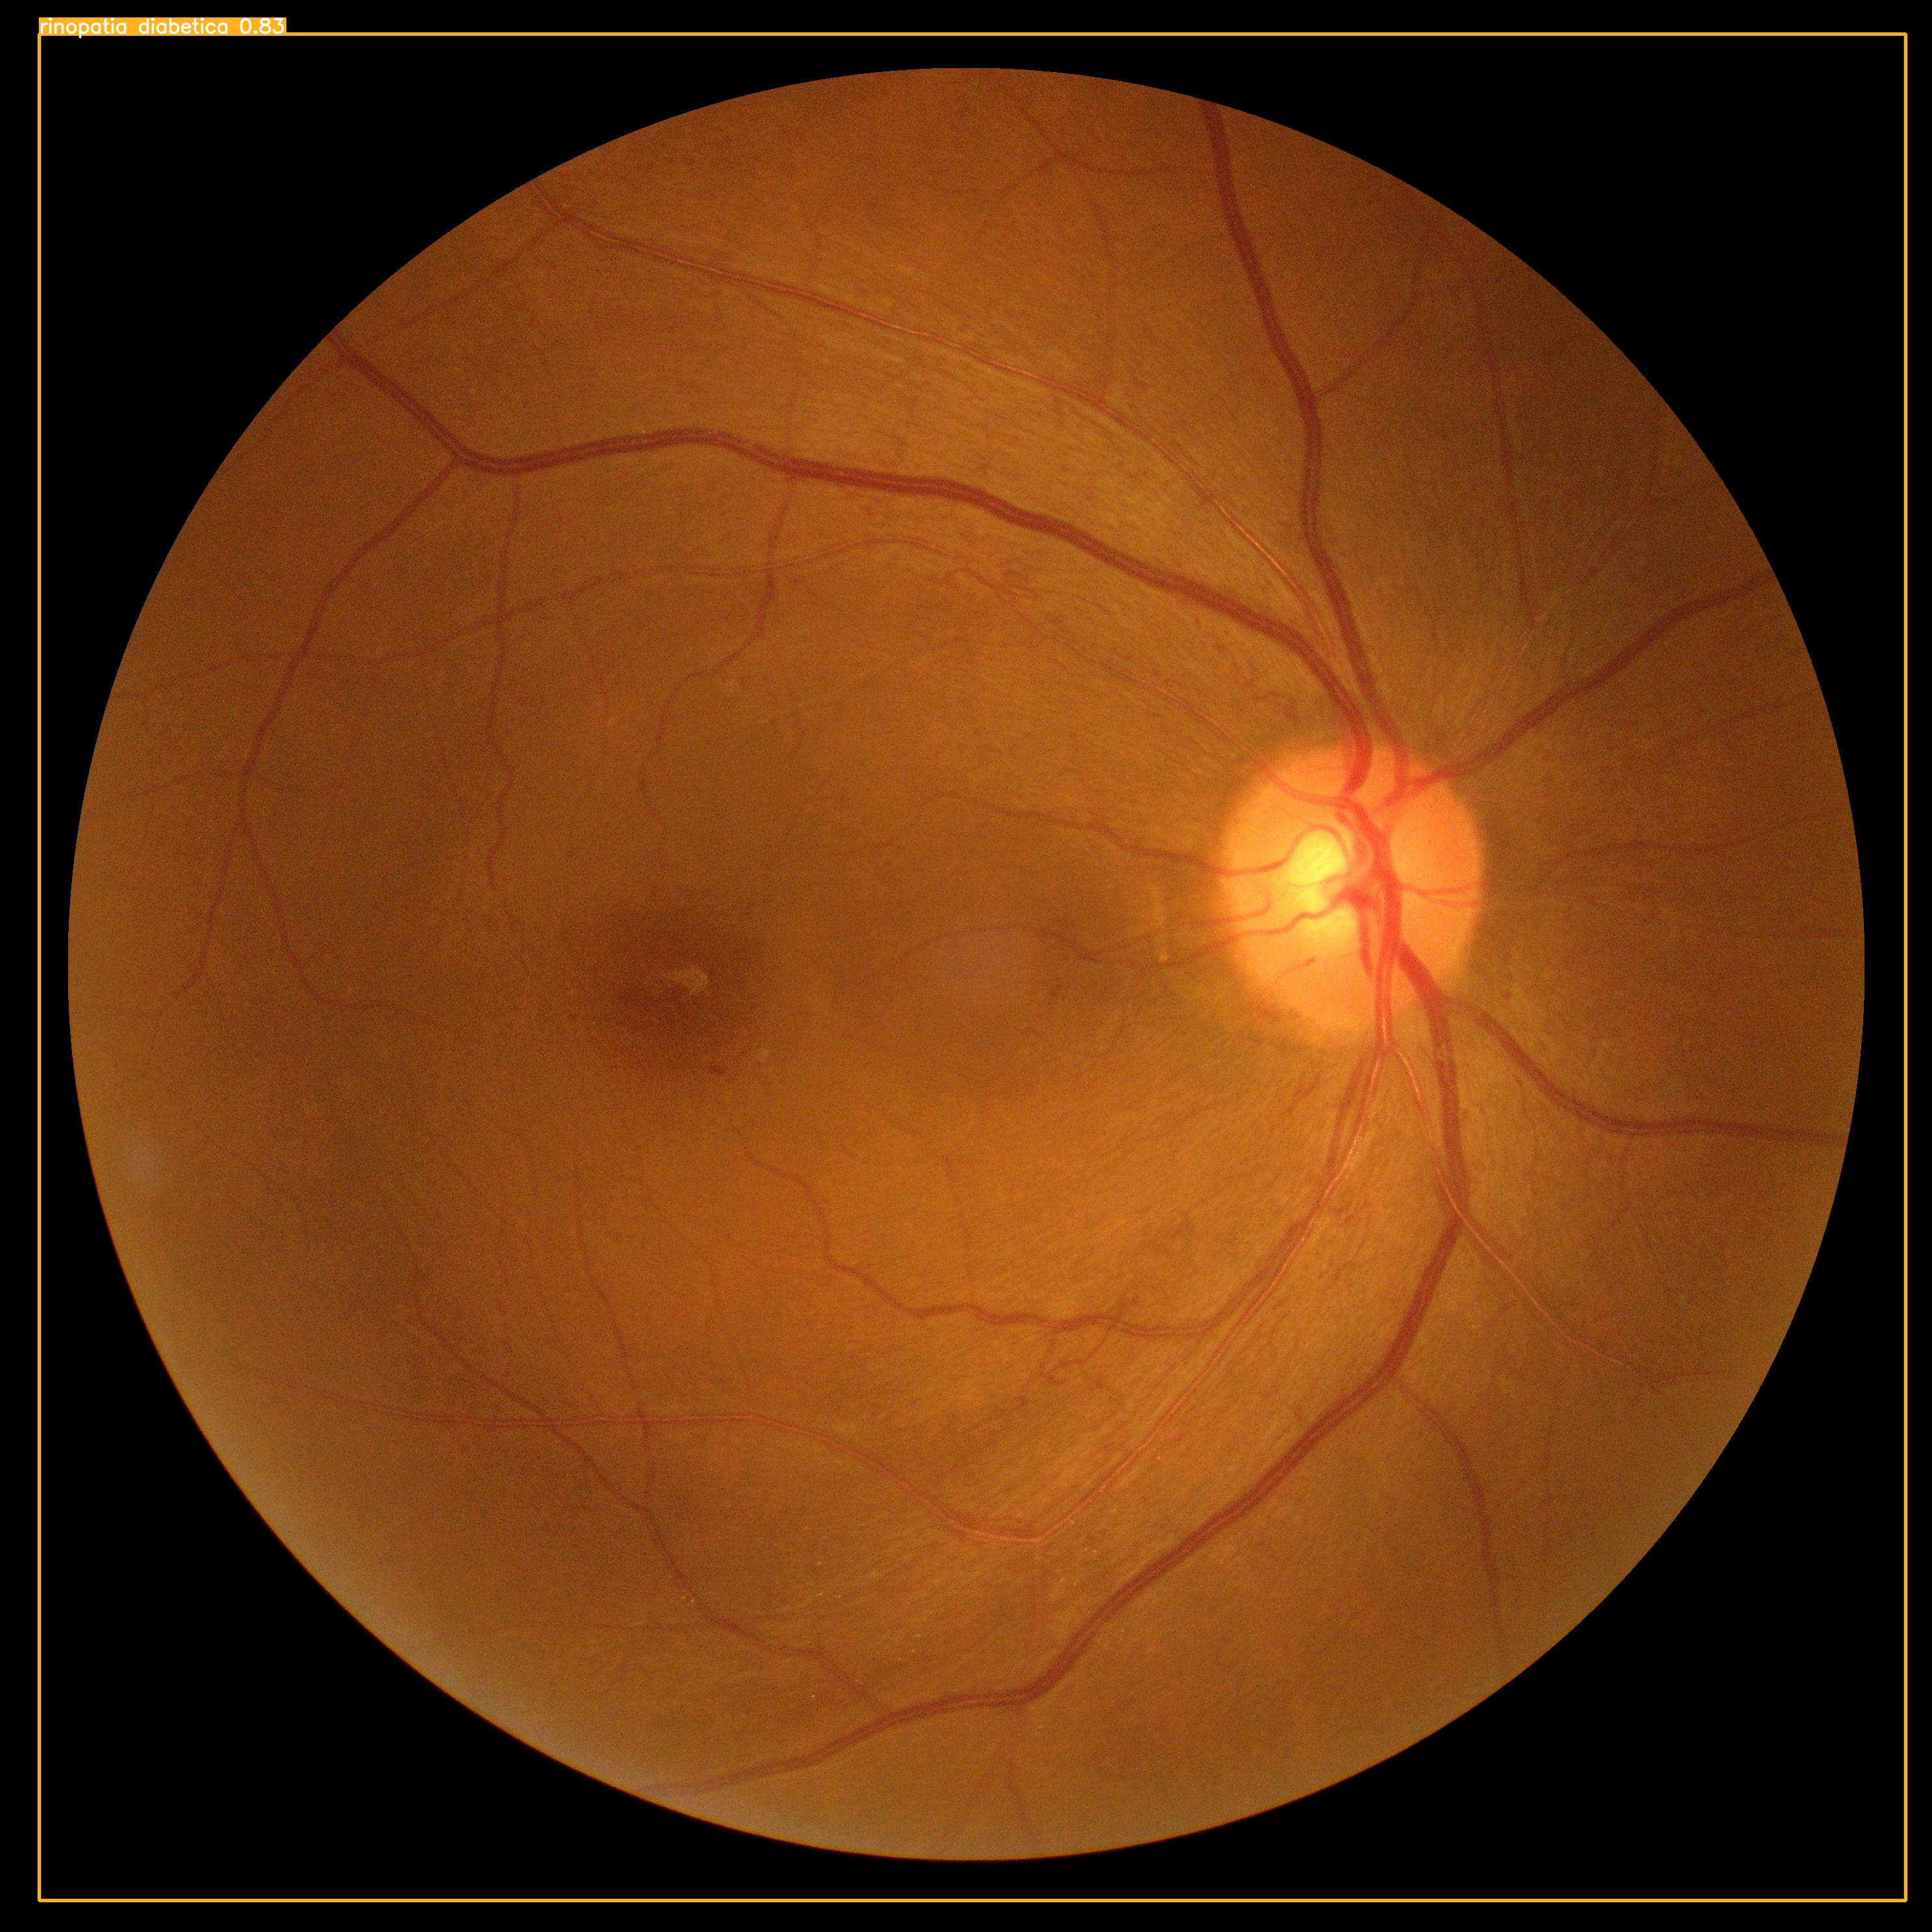

In [ ]:
#visualizamos 10 imagenes con el funcionamiento de la red neuronal
import glob
from IPython.display import Image, display
i=0
j=0
for imageName in glob.glob("runs/detect/exp/*.jpg"):
  i+=1
  if i < 10:
    display(Image(filename = imageName))
    print("\n")

In [ ]:
##realizamos el conteo de palabra o etiquetas que aparecieron en la ejecucion de otro data set seleccionado




def contar_palabras(texto):
    # Convierte el texto a minúsculas para hacer la búsqueda insensible a mayúsculas
    texto = texto.lower()

    # Palabras a buscar
    palabras_a_contar = ["catarata", "glaucoma", "normal", "rinopatia diabetica"]

    # Inicializa un diccionario para almacenar el recuento de cada palabra
    recuento_palabras = {palabra: 0 for palabra in palabras_a_contar}

    # Divide el texto en palabras
    palabras = texto.split()

    # Cuenta la frecuencia de cada palabra
    for palabra in palabras:
        # Elimina signos de puntuación alrededor de las palabras
        palabra = palabra.strip('.,!?()[]{}":;')

        if palabra in recuento_palabras:
            recuento_palabras[palabra] += 1

    return recuento_palabras

# Ejemplo de uso
texto_ejemplo = """
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/417 /content/yolov5/prueba/1000_left.jpg: 320x416 1 rinopatia diabetica, 222.2ms
image 2/417 /content/yolov5/prueba/1000_right.jpg: 320x416 1 normal, 131.8ms
image 3/417 /content/yolov5/prueba/1001_left.jpg: 288x416 1 rinopatia diabetica, 125.6ms
image 4/417 /content/yolov5/prueba/1001_right.jpg: 288x416 1 rinopatia diabetica, 110.5ms
image 5/417 /content/yolov5/prueba/1002_left.jpg: 288x416 1 rinopatia diabetica, 182.2ms
image 6/417 /content/yolov5/prueba/1002_right.jpg: 288x416 1 rinopatia diabetica, 182.8ms
image 7/417 /content/yolov5/prueba/1003_left.jpg: 288x416 1 glaucoma, 1 rinopatia diabetica, 172.9ms
image 8/417 /content/yolov5/prueba/1003_right.jpg: 288x416 1 rinopatia diabetica, 165.5ms
image 9/417 /content/yolov5/prueba/1004_left.jpg: 288x416 1 rinopatia diabetica, 173.8ms
image 10/417 /content/yolov5/prueba/1004_right.jpg: 288x416 1 rinopatia diabetica, 180.9ms
image 11/417 /content/yolov5/prueba/1007_left.jpg: 288x416 1 rinopatia diabetica, 178.2ms
image 12/417 /content/yolov5/prueba/1007_right.jpg: 288x416 1 rinopatia diabetica, 175.7ms
image 13/417 /content/yolov5/prueba/1009_left.jpg: 288x416 1 rinopatia diabetica, 169.6ms
image 14/417 /content/yolov5/prueba/1009_right.jpg: 288x416 1 rinopatia diabetica, 174.9ms
image 15/417 /content/yolov5/prueba/1026_left.jpg: 320x416 1 rinopatia diabetica, 132.7ms
image 16/417 /content/yolov5/prueba/1026_right.jpg: 320x416 1 normal, 134.4ms
image 17/417 /content/yolov5/prueba/1027_left.jpg: 288x416 1 normal, 1 rinopatia diabetica, 115.6ms
image 18/417 /content/yolov5/prueba/1027_right.jpg: 288x416 1 normal, 1 rinopatia diabetica, 114.1ms
image 19/417 /content/yolov5/prueba/1029_left.jpg: 288x416 1 rinopatia diabetica, 117.4ms
image 20/417 /content/yolov5/prueba/1029_right.jpg: 288x416 1 rinopatia diabetica, 106.3ms
image 21/417 /content/yolov5/prueba/1030_left.jpg: 288x416 1 rinopatia diabetica, 109.5ms
image 22/417 /content/yolov5/prueba/1030_right.jpg: 288x416 1 rinopatia diabetica, 120.9ms
image 23/417 /content/yolov5/prueba/1037_left.jpg: 288x416 1 rinopatia diabetica, 116.1ms
image 24/417 /content/yolov5/prueba/1037_right.jpg: 288x416 1 rinopatia diabetica, 112.1ms
image 25/417 /content/yolov5/prueba/1042_left.jpg: 288x416 1 rinopatia diabetica, 118.9ms
image 26/417 /content/yolov5/prueba/1042_right.jpg: 288x416 1 rinopatia diabetica, 114.3ms
image 27/417 /content/yolov5/prueba/1044_left.jpg: 288x416 1 rinopatia diabetica, 116.2ms
image 28/417 /content/yolov5/prueba/1044_right.jpg: 288x416 1 rinopatia diabetica, 111.3ms
image 29/417 /content/yolov5/prueba/1047_left.jpg: 288x416 1 rinopatia diabetica, 118.4ms
image 30/417 /content/yolov5/prueba/1047_right.jpg: 288x416 1 rinopatia diabetica, 123.0ms
image 31/417 /content/yolov5/prueba/1049_left.jpg: 288x416 1 rinopatia diabetica, 111.2ms
image 32/417 /content/yolov5/prueba/1049_right.jpg: 288x416 1 normal, 109.4ms
image 33/417 /content/yolov5/prueba/1051_left.jpg: 288x416 1 normal, 106.0ms
image 34/417 /content/yolov5/prueba/1051_right.jpg: 288x416 1 normal, 113.1ms
image 35/417 /content/yolov5/prueba/1055_left.jpg: 416x416 1 normal, 248.4ms
image 36/417 /content/yolov5/prueba/1055_right.jpg: 384x416 1 rinopatia diabetica, 228.8ms
image 37/417 /content/yolov5/prueba/1057_left.jpg: 288x416 1 rinopatia diabetica, 180.1ms
image 38/417 /content/yolov5/prueba/1057_right.jpg: 288x416 1 rinopatia diabetica, 163.6ms
image 39/417 /content/yolov5/prueba/1063_left.jpg: 416x416 1 normal, 235.5ms
image 40/417 /content/yolov5/prueba/1063_right.jpg: 416x416 1 normal, 255.4ms
image 41/417 /content/yolov5/prueba/1067_left.jpg: 288x416 1 rinopatia diabetica, 180.7ms
image 42/417 /content/yolov5/prueba/1067_right.jpg: 288x416 1 rinopatia diabetica, 168.4ms
image 43/417 /content/yolov5/prueba/1069_left.jpg: 288x416 1 rinopatia diabetica, 178.2ms
image 44/417 /content/yolov5/prueba/1069_right.jpg: 288x416 1 rinopatia diabetica, 171.5ms
image 45/417 /content/yolov5/prueba/1070_left.jpg: 288x416 1 rinopatia diabetica, 118.6ms
image 46/417 /content/yolov5/prueba/1070_right.jpg: 288x416 1 rinopatia diabetica, 122.7ms
image 47/417 /content/yolov5/prueba/1073_left.jpg: 288x416 1 rinopatia diabetica, 106.6ms
image 48/417 /content/yolov5/prueba/1073_right.jpg: 288x416 1 rinopatia diabetica, 113.9ms
image 49/417 /content/yolov5/prueba/1076_left.jpg: 288x416 1 normal, 109.6ms
image 50/417 /content/yolov5/prueba/1076_right.jpg: 288x416 1 normal, 1 rinopatia diabetica, 116.5ms
image 51/417 /content/yolov5/prueba/1078_left.jpg: 288x416 1 rinopatia diabetica, 101.5ms
image 52/417 /content/yolov5/prueba/1078_right.jpg: 288x416 1 rinopatia diabetica, 108.9ms
image 53/417 /content/yolov5/prueba/1088_left.jpg: 288x416 1 rinopatia diabetica, 108.1ms
image 54/417 /content/yolov5/prueba/1088_right.jpg: 288x416 1 rinopatia diabetica, 120.3ms
image 55/417 /content/yolov5/prueba/1100_left.jpg: 288x416 1 rinopatia diabetica, 107.3ms
image 56/417 /content/yolov5/prueba/1100_right.jpg: 288x416 1 rinopatia diabetica, 104.1ms
image 57/417 /content/yolov5/prueba/1105_left.jpg: 288x416 1 rinopatia diabetica, 122.8ms
image 58/417 /content/yolov5/prueba/1105_right.jpg: 288x416 1 rinopatia diabetica, 111.2ms
image 59/417 /content/yolov5/prueba/1107_left.jpg: 416x416 1 normal, 160.3ms
image 60/417 /content/yolov5/prueba/1107_right.jpg: 416x416 1 normal, 146.8ms
image 61/417 /content/yolov5/prueba/1108_left.jpg: 288x416 1 normal, 105.6ms
image 62/417 /content/yolov5/prueba/1108_right.jpg: 288x416 1 rinopatia diabetica, 113.2ms
image 63/417 /content/yolov5/prueba/1110_left.jpg: 288x416 1 rinopatia diabetica, 107.2ms
image 64/417 /content/yolov5/prueba/1110_right.jpg: 288x416 1 rinopatia diabetica, 108.3ms
image 65/417 /content/yolov5/prueba/1112_left.jpg: 320x416 1 normal, 1 rinopatia diabetica, 121.6ms
image 66/417 /content/yolov5/prueba/1112_right.jpg: 320x416 1 rinopatia diabetica, 127.7ms
image 67/417 /content/yolov5/prueba/1128_left.jpg: 288x416 1 rinopatia diabetica, 106.2ms
image 68/417 /content/yolov5/prueba/1128_right.jpg: 288x416 1 rinopatia diabetica, 103.5ms
image 69/417 /content/yolov5/prueba/1135_left.jpg: 288x416 1 rinopatia diabetica, 105.8ms
image 70/417 /content/yolov5/prueba/1135_right.jpg: 288x416 1 rinopatia diabetica, 108.4ms
image 71/417 /content/yolov5/prueba/1178_left.jpg: 320x416 1 normal, 1 rinopatia diabetica, 120.5ms
image 72/417 /content/yolov5/prueba/1178_right.jpg: 320x416 1 rinopatia diabetica, 125.3ms
image 73/417 /content/yolov5/prueba/1179_left.jpg: 288x416 1 rinopatia diabetica, 112.2ms
image 74/417 /content/yolov5/prueba/1179_right.jpg: 288x416 1 rinopatia diabetica, 106.2ms
image 75/417 /content/yolov5/prueba/1180_left.jpg: 288x416 1 rinopatia diabetica, 121.5ms
image 76/417 /content/yolov5/prueba/1180_right.jpg: 288x416 1 rinopatia diabetica, 149.2ms
image 77/417 /content/yolov5/prueba/1183_left.jpg: 288x416 1 rinopatia diabetica, 108.2ms
image 78/417 /content/yolov5/prueba/1183_right.jpg: 288x416 1 normal, 1 rinopatia diabetica, 112.8ms
image 79/417 /content/yolov5/prueba/1184_left.jpg: 320x416 1 rinopatia diabetica, 121.7ms
image 80/417 /content/yolov5/prueba/1184_right.jpg: 320x416 1 normal, 1 rinopatia diabetica, 120.5ms
image 81/417 /content/yolov5/prueba/1192_left.jpg: 416x416 1 rinopatia diabetica, 142.7ms
image 82/417 /content/yolov5/prueba/1192_right.jpg: 416x416 1 rinopatia diabetica, 157.2ms
image 83/417 /content/yolov5/prueba/1193_left.jpg: 288x416 1 normal, 116.3ms
image 84/417 /content/yolov5/prueba/1193_right.jpg: 288x416 1 normal, 176.8ms
image 85/417 /content/yolov5/prueba/1199_left.jpg: 320x416 1 rinopatia diabetica, 205.2ms
image 86/417 /content/yolov5/prueba/1199_right.jpg: 320x416 1 rinopatia diabetica, 184.0ms
image 87/417 /content/yolov5/prueba/1201_left.jpg: 288x416 1 rinopatia diabetica, 163.7ms
image 88/417 /content/yolov5/prueba/1201_right.jpg: 288x416 1 rinopatia diabetica, 180.4ms
image 89/417 /content/yolov5/prueba/1224_left.jpg: 320x416 1 normal, 195.6ms
image 90/417 /content/yolov5/prueba/1224_right.jpg: 320x416 1 normal, 191.2ms
image 91/417 /content/yolov5/prueba/1244_left.jpg: 288x416 1 rinopatia diabetica, 165.9ms
image 92/417 /content/yolov5/prueba/1244_right.jpg: 288x416 1 rinopatia diabetica, 179.0ms
image 93/417 /content/yolov5/prueba/1249_left.jpg: 288x416 1 rinopatia diabetica, 111.5ms
image 94/417 /content/yolov5/prueba/1249_right.jpg: 288x416 1 rinopatia diabetica, 111.8ms
image 95/417 /content/yolov5/prueba/1252_left.jpg: 288x416 1 rinopatia diabetica, 116.1ms
image 96/417 /content/yolov5/prueba/1252_right.jpg: 288x416 1 rinopatia diabetica, 108.7ms
image 97/417 /content/yolov5/prueba/1257_left.jpg: 288x416 1 glaucoma, 105.4ms
image 98/417 /content/yolov5/prueba/1257_right.jpg: 288x416 1 rinopatia diabetica, 106.6ms
image 99/417 /content/yolov5/prueba/1275_left.jpg: 384x416 1 normal, 1 rinopatia diabetica, 143.7ms
image 100/417 /content/yolov5/prueba/1275_right.jpg: 384x416 1 normal, 1 rinopatia diabetica, 145.0ms
image 101/417 /content/yolov5/prueba/2032_right.jpg: 416x416 3 normals, 156.8ms
image 102/417 /content/yolov5/prueba/2041_left.jpg: 416x416 1 normal, 163.9ms
image 103/417 /content/yolov5/prueba/2048_right.jpg: 416x416 1 normal, 149.9ms
image 104/417 /content/yolov5/prueba/2063_left.jpg: 416x416 2 normals, 157.3ms
image 105/417 /content/yolov5/prueba/2063_right.jpg: 416x416 2 normals, 159.2ms
image 106/417 /content/yolov5/prueba/2074_left.jpg: 416x416 1 normal, 164.2ms
image 107/417 /content/yolov5/prueba/2262_left.jpg: 416x416 1 catarata, 152.5ms
image 108/417 /content/yolov5/prueba/2282_right.jpg: 416x416 1 catarata, 150.2ms
image 109/417 /content/yolov5/prueba/4623_left.jpg: 288x416 1 rinopatia diabetica, 113.7ms
image 110/417 /content/yolov5/prueba/4623_right.jpg: 288x416 1 rinopatia diabetica, 114.0ms
image 111/417 /content/yolov5/prueba/4624_left.jpg: 288x416 1 rinopatia diabetica, 120.4ms
image 112/417 /content/yolov5/prueba/4624_right.jpg: 288x416 1 rinopatia diabetica, 109.3ms
image 113/417 /content/yolov5/prueba/4625_left.jpg: 320x416 1 rinopatia diabetica, 117.5ms
image 114/417 /content/yolov5/prueba/4625_right.jpg: 320x416 1 rinopatia diabetica, 123.2ms
image 115/417 /content/yolov5/prueba/4626_left.jpg: 416x416 1 normal, 153.1ms
image 116/417 /content/yolov5/prueba/4626_right.jpg: 416x416 1 normal, 162.1ms
image 117/417 /content/yolov5/prueba/4627_left.jpg: 288x416 1 rinopatia diabetica, 103.2ms
image 118/417 /content/yolov5/prueba/4627_right.jpg: 288x416 1 rinopatia diabetica, 104.7ms
image 119/417 /content/yolov5/prueba/4628_left.jpg: 416x416 1 normal, 1 rinopatia diabetica, 154.9ms
image 120/417 /content/yolov5/prueba/4628_right.jpg: 416x416 1 rinopatia diabetica, 155.4ms
image 121/417 /content/yolov5/prueba/4629_left.jpg: 288x416 1 rinopatia diabetica, 106.3ms
image 122/417 /content/yolov5/prueba/4629_right.jpg: 288x416 1 rinopatia diabetica, 108.9ms
image 123/417 /content/yolov5/prueba/4630_left.jpg: 288x416 1 rinopatia diabetica, 105.5ms
image 124/417 /content/yolov5/prueba/4630_right.jpg: 288x416 1 rinopatia diabetica, 112.9ms
image 125/417 /content/yolov5/prueba/4631_left.jpg: 288x416 1 rinopatia diabetica, 106.8ms
image 126/417 /content/yolov5/prueba/4631_right.jpg: 288x416 1 rinopatia diabetica, 110.4ms
image 127/417 /content/yolov5/prueba/4632_left.jpg: 288x416 1 rinopatia diabetica, 108.7ms
image 128/417 /content/yolov5/prueba/4632_right.jpg: 288x416 1 rinopatia diabetica, 110.7ms
image 129/417 /content/yolov5/prueba/4633_left.jpg: 320x416 1 normal, 117.4ms
image 130/417 /content/yolov5/prueba/4633_right.jpg: 320x416 1 normal, 118.0ms
image 131/417 /content/yolov5/prueba/4634_left.jpg: 288x416 1 rinopatia diabetica, 111.5ms
image 132/417 /content/yolov5/prueba/4634_right.jpg: 288x416 1 rinopatia diabetica, 111.1ms
image 133/417 /content/yolov5/prueba/4635_left.jpg: 288x416 1 rinopatia diabetica, 107.9ms
image 134/417 /content/yolov5/prueba/4635_right.jpg: 288x416 1 rinopatia diabetica, 105.3ms
image 135/417 /content/yolov5/prueba/4636_left.jpg: 320x416 1 rinopatia diabetica, 139.1ms
image 136/417 /content/yolov5/prueba/4636_right.jpg: 320x416 1 rinopatia diabetica, 189.2ms
image 137/417 /content/yolov5/prueba/4637_left.jpg: 288x416 1 rinopatia diabetica, 163.8ms
image 138/417 /content/yolov5/prueba/4637_right.jpg: 288x416 1 rinopatia diabetica, 180.7ms
image 139/417 /content/yolov5/prueba/4638_left.jpg: 320x416 1 normal, 185.0ms
image 140/417 /content/yolov5/prueba/4638_right.jpg: 320x416 1 normal, 1 rinopatia diabetica, 183.3ms
image 141/417 /content/yolov5/prueba/4639_left.jpg: 320x416 1 rinopatia diabetica, 196.7ms
image 142/417 /content/yolov5/prueba/4639_right.jpg: 320x416 1 rinopatia diabetica, 180.5ms
image 143/417 /content/yolov5/prueba/4640_left.jpg: 416x416 1 normal, 1 rinopatia diabetica, 237.3ms
image 144/417 /content/yolov5/prueba/4640_right.jpg: 416x416 1 normal, 1 rinopatia diabetica, 242.3ms
image 145/417 /content/yolov5/prueba/4641_left.jpg: 288x416 1 rinopatia diabetica, 125.8ms
image 146/417 /content/yolov5/prueba/4641_right.jpg: 288x416 1 rinopatia diabetica, 106.8ms
image 147/417 /content/yolov5/prueba/4642_left.jpg: 224x416 1 rinopatia diabetica, 99.2ms
image 148/417 /content/yolov5/prueba/4642_right.jpg: 224x416 1 rinopatia diabetica, 87.2ms
image 149/417 /content/yolov5/prueba/4643_left.jpg: 288x416 1 rinopatia diabetica, 104.3ms
image 150/417 /content/yolov5/prueba/4643_right.jpg: 288x416 1 rinopatia diabetica, 121.5ms
image 151/417 /content/yolov5/prueba/4644_left.jpg: 288x416 1 rinopatia diabetica, 104.1ms
image 152/417 /content/yolov5/prueba/4644_right.jpg: 288x416 1 rinopatia diabetica, 116.3ms
image 153/417 /content/yolov5/prueba/4645_left.jpg: 416x416 1 normal, 145.4ms
image 154/417 /content/yolov5/prueba/4645_right.jpg: 416x416 1 normal, 159.5ms
image 155/417 /content/yolov5/prueba/4647_left.jpg: 224x416 1 rinopatia diabetica, 88.5ms
image 156/417 /content/yolov5/prueba/4647_right.jpg: 224x416 1 rinopatia diabetica, 86.3ms
image 157/417 /content/yolov5/prueba/4650_left.jpg: 288x416 1 rinopatia diabetica, 108.3ms
image 158/417 /content/yolov5/prueba/4650_right.jpg: 288x416 1 rinopatia diabetica, 106.5ms
image 159/417 /content/yolov5/prueba/4651_left.jpg: 320x416 1 normal, 1 rinopatia diabetica, 122.1ms
image 160/417 /content/yolov5/prueba/4651_right.jpg: 320x416 1 normal, 121.3ms
image 161/417 /content/yolov5/prueba/4653_left.jpg: 288x416 1 rinopatia diabetica, 117.4ms
image 162/417 /content/yolov5/prueba/4653_right.jpg: 288x416 1 rinopatia diabetica, 111.1ms
image 163/417 /content/yolov5/prueba/4655_left.jpg: 288x416 1 rinopatia diabetica, 104.5ms
image 164/417 /content/yolov5/prueba/4655_right.jpg: 288x416 1 rinopatia diabetica, 105.4ms
image 165/417 /content/yolov5/prueba/4657_left.jpg: 416x416 1 normal, 148.0ms
image 166/417 /content/yolov5/prueba/4657_right.jpg: 416x416 1 normal, 1 rinopatia diabetica, 154.5ms
image 167/417 /content/yolov5/prueba/4658_left.jpg: 320x416 1 normal, 1 rinopatia diabetica, 133.8ms
image 168/417 /content/yolov5/prueba/4658_right.jpg: 320x416 1 normal, 116.7ms
image 169/417 /content/yolov5/prueba/4659_left.jpg: 288x416 1 rinopatia diabetica, 108.1ms
image 170/417 /content/yolov5/prueba/4659_right.jpg: 288x416 1 rinopatia diabetica, 107.3ms
image 171/417 /content/yolov5/prueba/4660_left.jpg: 288x416 1 rinopatia diabetica, 105.7ms
image 172/417 /content/yolov5/prueba/4660_right.jpg: 288x416 1 rinopatia diabetica, 106.3ms
image 173/417 /content/yolov5/prueba/4664_left.jpg: 288x416 1 rinopatia diabetica, 110.4ms
image 174/417 /content/yolov5/prueba/4664_right.jpg: 288x416 1 rinopatia diabetica, 106.5ms
image 175/417 /content/yolov5/prueba/4669_left.jpg: 288x416 1 normal, 1 rinopatia diabetica, 108.0ms
image 176/417 /content/yolov5/prueba/4669_right.jpg: 288x416 1 normal, 1 rinopatia diabetica, 112.8ms
image 177/417 /content/yolov5/prueba/4670_left.jpg: 288x416 1 rinopatia diabetica, 105.7ms
image 178/417 /content/yolov5/prueba/4670_right.jpg: 288x416 1 rinopatia diabetica, 106.7ms
image 179/417 /content/yolov5/prueba/4671_left.jpg: 288x416 1 rinopatia diabetica, 119.6ms
image 180/417 /content/yolov5/prueba/4671_right.jpg: 288x416 1 rinopatia diabetica, 119.0ms
image 181/417 /content/yolov5/prueba/4672_left.jpg: 288x416 1 rinopatia diabetica, 106.2ms
image 182/417 /content/yolov5/prueba/4672_right.jpg: 288x416 1 rinopatia diabetica, 107.3ms
image 183/417 /content/yolov5/prueba/4673_left.jpg: 320x416 1 normal, 125.5ms
image 184/417 /content/yolov5/prueba/4673_right.jpg: 320x416 1 normal, 121.3ms
image 185/417 /content/yolov5/prueba/4675_left.jpg: 288x416 1 normal, 116.4ms
image 186/417 /content/yolov5/prueba/4675_right.jpg: 288x416 1 normal, 114.8ms
image 187/417 /content/yolov5/prueba/4676_left.jpg: 288x416 1 rinopatia diabetica, 167.9ms
image 188/417 /content/yolov5/prueba/4676_right.jpg: 288x416 1 rinopatia diabetica, 170.5ms
image 189/417 /content/yolov5/prueba/4677_left.jpg: 288x416 1 rinopatia diabetica, 172.3ms
image 190/417 /content/yolov5/prueba/4677_right.jpg: 288x416 1 rinopatia diabetica, 186.6ms
image 191/417 /content/yolov5/prueba/4678_left.jpg: 288x416 1 rinopatia diabetica, 170.0ms
image 192/417 /content/yolov5/prueba/4678_right.jpg: 288x416 1 rinopatia diabetica, 163.1ms
image 193/417 /content/yolov5/prueba/4679_left.jpg: 288x416 1 rinopatia diabetica, 183.5ms
image 194/417 /content/yolov5/prueba/4679_right.jpg: 288x416 1 rinopatia diabetica, 181.2ms
image 195/417 /content/yolov5/prueba/4682_left.jpg: 288x416 1 rinopatia diabetica, 180.5ms
image 196/417 /content/yolov5/prueba/4682_right.jpg: 288x416 1 rinopatia diabetica, 120.0ms
image 197/417 /content/yolov5/prueba/4683_left.jpg: 416x416 1 normal, 1 rinopatia diabetica, 144.2ms
image 198/417 /content/yolov5/prueba/4683_right.jpg: 416x416 1 rinopatia diabetica, 152.4ms
image 199/417 /content/yolov5/prueba/4686_left.jpg: 288x416 1 rinopatia diabetica, 110.9ms
image 200/417 /content/yolov5/prueba/4686_right.jpg: 288x416 1 rinopatia diabetica, 112.9ms
image 201/417 /content/yolov5/prueba/4688_left.jpg: 288x416 1 rinopatia diabetica, 109.4ms
image 202/417 /content/yolov5/prueba/4688_right.jpg: 288x416 1 rinopatia diabetica, 109.7ms
image 203/417 /content/yolov5/prueba/4689_left.jpg: 288x416 1 rinopatia diabetica, 109.6ms
image 204/417 /content/yolov5/prueba/4689_right.jpg: 288x416 1 rinopatia diabetica, 120.9ms
image 205/417 /content/yolov5/prueba/4690_left.jpg: 288x416 1 normal, 108.1ms
image 206/417 /content/yolov5/prueba/4690_right.jpg: 288x416 1 normal, 1 rinopatia diabetica, 109.5ms
image 207/417 /content/yolov5/prueba/4784_left.jpg: 320x416 1 normal, 116.9ms
image 208/417 /content/yolov5/prueba/4784_right.jpg: 320x416 1 normal, 117.4ms
image 209/417 /content/yolov5/prueba/937_left.jpg: 416x416 1 rinopatia diabetica, 151.5ms
image 210/417 /content/yolov5/prueba/937_right.jpg: 416x416 1 rinopatia diabetica, 150.9ms
image 211/417 /content/yolov5/prueba/967_left.jpg: 288x416 1 rinopatia diabetica, 122.3ms
image 212/417 /content/yolov5/prueba/967_right.jpg: 288x416 1 rinopatia diabetica, 104.8ms
image 213/417 /content/yolov5/prueba/988_left.jpg: 416x416 1 normal, 146.2ms
image 214/417 /content/yolov5/prueba/988_right.jpg: 416x416 1 normal, 148.5ms
image 215/417 /content/yolov5/prueba/995_left.jpg: 288x416 1 rinopatia diabetica, 107.6ms
image 216/417 /content/yolov5/prueba/995_right.jpg: 288x416 1 rinopatia diabetica, 103.4ms
image 217/417 /content/yolov5/prueba/Glaucoma_001.png: 288x416 1 rinopatia diabetica, 104.2ms
image 218/417 /content/yolov5/prueba/Glaucoma_002.png: 288x416 1 rinopatia diabetica, 114.0ms
image 219/417 /content/yolov5/prueba/Glaucoma_003.png: 288x416 1 rinopatia diabetica, 109.2ms
image 220/417 /content/yolov5/prueba/Glaucoma_004.png: 288x416 1 rinopatia diabetica, 106.1ms
image 221/417 /content/yolov5/prueba/Glaucoma_005.png: 288x416 1 rinopatia diabetica, 113.4ms
image 222/417 /content/yolov5/prueba/Glaucoma_006.png: 288x416 1 rinopatia diabetica, 106.5ms
image 223/417 /content/yolov5/prueba/Glaucoma_007.png: 288x416 1 rinopatia diabetica, 124.5ms
image 224/417 /content/yolov5/prueba/Glaucoma_008.png: 288x416 1 rinopatia diabetica, 105.9ms
image 225/417 /content/yolov5/prueba/Glaucoma_009.png: 288x416 1 rinopatia diabetica, 113.8ms
image 226/417 /content/yolov5/prueba/Glaucoma_010.png: 288x416 1 rinopatia diabetica, 109.8ms
image 227/417 /content/yolov5/prueba/Glaucoma_011.png: 288x416 1 rinopatia diabetica, 108.3ms
image 228/417 /content/yolov5/prueba/Glaucoma_012.png: 288x416 1 rinopatia diabetica, 175.7ms
image 229/417 /content/yolov5/prueba/Glaucoma_013.png: 288x416 1 rinopatia diabetica, 165.4ms
image 230/417 /content/yolov5/prueba/Glaucoma_014.png: 288x416 1 rinopatia diabetica, 158.4ms
image 231/417 /content/yolov5/prueba/Glaucoma_015.png: 288x416 1 rinopatia diabetica, 161.6ms
image 232/417 /content/yolov5/prueba/Glaucoma_016.png: 288x416 1 rinopatia diabetica, 158.0ms
image 233/417 /content/yolov5/prueba/Glaucoma_017.png: 288x416 1 rinopatia diabetica, 178.9ms
image 234/417 /content/yolov5/prueba/Glaucoma_018.png: 288x416 1 rinopatia diabetica, 108.1ms
image 235/417 /content/yolov5/prueba/Glaucoma_019.png: 288x416 1 rinopatia diabetica, 108.0ms
image 236/417 /content/yolov5/prueba/Glaucoma_020.png: 288x416 1 rinopatia diabetica, 121.4ms
image 237/417 /content/yolov5/prueba/Glaucoma_021.png: 288x416 1 rinopatia diabetica, 111.6ms
image 238/417 /content/yolov5/prueba/Glaucoma_022.png: 288x416 1 rinopatia diabetica, 110.5ms
image 239/417 /content/yolov5/prueba/Glaucoma_023.png: 288x416 1 rinopatia diabetica, 119.6ms
image 240/417 /content/yolov5/prueba/Glaucoma_024.png: 288x416 1 rinopatia diabetica, 106.5ms
image 241/417 /content/yolov5/prueba/Glaucoma_025.png: 288x416 1 rinopatia diabetica, 107.4ms
image 242/417 /content/yolov5/prueba/Glaucoma_026.png: 288x416 1 rinopatia diabetica, 109.6ms
image 243/417 /content/yolov5/prueba/Glaucoma_027.png: 288x416 1 rinopatia diabetica, 102.3ms
image 244/417 /content/yolov5/prueba/Glaucoma_028.png: 288x416 1 rinopatia diabetica, 103.9ms
image 245/417 /content/yolov5/prueba/Glaucoma_029.png: 288x416 1 rinopatia diabetica, 110.3ms
image 246/417 /content/yolov5/prueba/Glaucoma_030.png: 288x416 1 rinopatia diabetica, 125.6ms
image 247/417 /content/yolov5/prueba/Glaucoma_031.png: 288x416 1 rinopatia diabetica, 113.6ms
image 248/417 /content/yolov5/prueba/Glaucoma_032.png: 288x416 1 rinopatia diabetica, 103.6ms
image 249/417 /content/yolov5/prueba/Glaucoma_033.png: 288x416 1 rinopatia diabetica, 106.5ms
image 250/417 /content/yolov5/prueba/Glaucoma_034.png: 288x416 1 rinopatia diabetica, 106.1ms
image 251/417 /content/yolov5/prueba/Glaucoma_035.png: 288x416 1 rinopatia diabetica, 106.9ms
image 252/417 /content/yolov5/prueba/Glaucoma_036.png: 288x416 1 rinopatia diabetica, 103.6ms
image 253/417 /content/yolov5/prueba/Glaucoma_037.png: 288x416 1 rinopatia diabetica, 100.8ms
image 254/417 /content/yolov5/prueba/Glaucoma_038.png: 288x416 1 rinopatia diabetica, 103.0ms
image 255/417 /content/yolov5/prueba/Glaucoma_039.png: 288x416 1 rinopatia diabetica, 108.7ms
image 256/417 /content/yolov5/prueba/Glaucoma_040.png: 288x416 1 rinopatia diabetica, 119.7ms
image 257/417 /content/yolov5/prueba/Glaucoma_041.png: 288x416 1 rinopatia diabetica, 106.1ms
image 258/417 /content/yolov5/prueba/Glaucoma_042.png: 288x416 1 rinopatia diabetica, 179.3ms
image 259/417 /content/yolov5/prueba/Glaucoma_043.png: 288x416 1 rinopatia diabetica, 180.9ms
image 260/417 /content/yolov5/prueba/Glaucoma_044.png: 288x416 1 rinopatia diabetica, 188.0ms
image 261/417 /content/yolov5/prueba/Glaucoma_045.png: 288x416 1 rinopatia diabetica, 180.3ms
image 262/417 /content/yolov5/prueba/Glaucoma_046.png: 288x416 1 rinopatia diabetica, 170.7ms
image 263/417 /content/yolov5/prueba/Glaucoma_047.png: 288x416 1 rinopatia diabetica, 168.9ms
image 264/417 /content/yolov5/prueba/Glaucoma_048.png: 288x416 1 rinopatia diabetica, 132.2ms
image 265/417 /content/yolov5/prueba/Glaucoma_049.png: 288x416 1 rinopatia diabetica, 110.6ms
image 266/417 /content/yolov5/prueba/Glaucoma_050.png: 288x416 1 rinopatia diabetica, 105.8ms
image 267/417 /content/yolov5/prueba/Glaucoma_051.png: 288x416 1 rinopatia diabetica, 117.4ms
image 268/417 /content/yolov5/prueba/Glaucoma_052.png: 288x416 1 rinopatia diabetica, 113.0ms
image 269/417 /content/yolov5/prueba/Glaucoma_053.png: 288x416 1 rinopatia diabetica, 109.0ms
image 270/417 /content/yolov5/prueba/Glaucoma_054.png: 288x416 1 rinopatia diabetica, 121.6ms
image 271/417 /content/yolov5/prueba/Glaucoma_055.png: 288x416 1 rinopatia diabetica, 107.5ms
image 272/417 /content/yolov5/prueba/Glaucoma_056.png: 288x416 1 rinopatia diabetica, 121.7ms
image 273/417 /content/yolov5/prueba/Glaucoma_057.png: 288x416 1 rinopatia diabetica, 111.5ms
image 274/417 /content/yolov5/prueba/Glaucoma_058.png: 288x416 1 rinopatia diabetica, 111.0ms
image 275/417 /content/yolov5/prueba/Glaucoma_059.png: 288x416 1 rinopatia diabetica, 108.1ms
image 276/417 /content/yolov5/prueba/Glaucoma_060.png: 288x416 1 rinopatia diabetica, 113.5ms
image 277/417 /content/yolov5/prueba/Glaucoma_061.png: 288x416 1 rinopatia diabetica, 131.5ms
image 278/417 /content/yolov5/prueba/Glaucoma_062.png: 288x416 1 rinopatia diabetica, 106.9ms
image 279/417 /content/yolov5/prueba/Glaucoma_063.png: 288x416 1 rinopatia diabetica, 123.4ms
image 280/417 /content/yolov5/prueba/Glaucoma_064.png: 288x416 1 rinopatia diabetica, 108.0ms
image 281/417 /content/yolov5/prueba/Glaucoma_065.png: 288x416 1 rinopatia diabetica, 112.1ms
image 282/417 /content/yolov5/prueba/Glaucoma_066.png: 288x416 1 rinopatia diabetica, 108.7ms
image 283/417 /content/yolov5/prueba/Glaucoma_067.png: 288x416 1 rinopatia diabetica, 109.8ms
image 284/417 /content/yolov5/prueba/Glaucoma_068.png: 288x416 1 rinopatia diabetica, 121.1ms
image 285/417 /content/yolov5/prueba/Glaucoma_069.png: 288x416 1 rinopatia diabetica, 108.4ms
image 286/417 /content/yolov5/prueba/Glaucoma_070.png: 288x416 1 rinopatia diabetica, 106.5ms
image 287/417 /content/yolov5/prueba/Glaucoma_071.png: 288x416 1 rinopatia diabetica, 115.6ms
image 288/417 /content/yolov5/prueba/Glaucoma_072.png: 288x416 1 rinopatia diabetica, 176.8ms
image 289/417 /content/yolov5/prueba/Glaucoma_073.png: 288x416 1 rinopatia diabetica, 174.8ms
image 290/417 /content/yolov5/prueba/Glaucoma_074.png: 288x416 1 rinopatia diabetica, 266.2ms
image 291/417 /content/yolov5/prueba/Glaucoma_075.png: 288x416 1 rinopatia diabetica, 160.5ms
image 292/417 /content/yolov5/prueba/Glaucoma_076.png: 288x416 1 rinopatia diabetica, 174.4ms
image 293/417 /content/yolov5/prueba/Glaucoma_077.png: 288x416 1 rinopatia diabetica, 127.0ms
image 294/417 /content/yolov5/prueba/Glaucoma_078.png: 288x416 1 rinopatia diabetica, 112.3ms
image 295/417 /content/yolov5/prueba/Glaucoma_079.png: 288x416 1 rinopatia diabetica, 107.2ms
image 296/417 /content/yolov5/prueba/Glaucoma_080.png: 288x416 1 rinopatia diabetica, 109.7ms
image 297/417 /content/yolov5/prueba/Glaucoma_081.png: 288x416 1 rinopatia diabetica, 109.5ms
image 298/417 /content/yolov5/prueba/Glaucoma_082.png: 288x416 1 rinopatia diabetica, 106.8ms
image 299/417 /content/yolov5/prueba/Glaucoma_083.png: 288x416 1 rinopatia diabetica, 114.2ms
image 300/417 /content/yolov5/prueba/Glaucoma_084.png: 288x416 1 rinopatia diabetica, 109.8ms
image 301/417 /content/yolov5/prueba/Glaucoma_085.png: 288x416 1 rinopatia diabetica, 115.6ms
image 302/417 /content/yolov5/prueba/Glaucoma_086.png: 288x416 1 rinopatia diabetica, 109.0ms
image 303/417 /content/yolov5/prueba/Glaucoma_087.png: 288x416 1 rinopatia diabetica, 112.3ms
image 304/417 /content/yolov5/prueba/Glaucoma_088.png: 288x416 1 rinopatia diabetica, 119.0ms
image 305/417 /content/yolov5/prueba/Glaucoma_089.png: 288x416 1 rinopatia diabetica, 117.8ms
image 306/417 /content/yolov5/prueba/Glaucoma_090.png: 288x416 1 rinopatia diabetica, 109.4ms
image 307/417 /content/yolov5/prueba/Glaucoma_091.png: 288x416 1 rinopatia diabetica, 111.0ms
image 308/417 /content/yolov5/prueba/Glaucoma_092.png: 288x416 1 rinopatia diabetica, 122.8ms
image 309/417 /content/yolov5/prueba/Glaucoma_093.png: 288x416 1 rinopatia diabetica, 107.6ms
image 310/417 /content/yolov5/prueba/Glaucoma_094.png: 288x416 1 rinopatia diabetica, 112.1ms
image 311/417 /content/yolov5/prueba/Glaucoma_095.png: 288x416 1 rinopatia diabetica, 121.0ms
image 312/417 /content/yolov5/prueba/Glaucoma_096.png: 288x416 1 rinopatia diabetica, 115.0ms
image 313/417 /content/yolov5/prueba/Glaucoma_097.png: 288x416 1 rinopatia diabetica, 106.5ms
image 314/417 /content/yolov5/prueba/Glaucoma_098.png: 288x416 1 rinopatia diabetica, 111.1ms
image 315/417 /content/yolov5/prueba/Glaucoma_099.png: 288x416 1 rinopatia diabetica, 108.0ms
image 316/417 /content/yolov5/prueba/Glaucoma_100.png: 288x416 1 rinopatia diabetica, 119.0ms
image 317/417 /content/yolov5/prueba/Glaucoma_101.png: 288x416 1 rinopatia diabetica, 166.6ms
image 318/417 /content/yolov5/prueba/cataract_001.png: 288x416 1 rinopatia diabetica, 160.5ms
image 319/417 /content/yolov5/prueba/cataract_002.png: 288x416 1 rinopatia diabetica, 169.1ms
image 320/417 /content/yolov5/prueba/cataract_003.png: 288x416 1 rinopatia diabetica, 162.9ms
image 321/417 /content/yolov5/prueba/cataract_004.png: 288x416 1 rinopatia diabetica, 180.3ms
image 322/417 /content/yolov5/prueba/cataract_005.png: 288x416 1 rinopatia diabetica, 208.5ms
image 323/417 /content/yolov5/prueba/cataract_006.png: 288x416 1 rinopatia diabetica, 108.6ms
image 324/417 /content/yolov5/prueba/cataract_007.png: 288x416 1 rinopatia diabetica, 109.2ms
image 325/417 /content/yolov5/prueba/cataract_008.png: 288x416 1 rinopatia diabetica, 105.0ms
image 326/417 /content/yolov5/prueba/cataract_009.png: 288x416 1 rinopatia diabetica, 114.8ms
image 327/417 /content/yolov5/prueba/cataract_010.png: 288x416 1 rinopatia diabetica, 109.7ms
image 328/417 /content/yolov5/prueba/cataract_011.png: 288x416 1 rinopatia diabetica, 111.0ms
image 329/417 /content/yolov5/prueba/cataract_012.png: 288x416 1 catarata, 1 rinopatia diabetica, 112.8ms
image 330/417 /content/yolov5/prueba/cataract_013.png: 288x416 1 rinopatia diabetica, 106.6ms
image 331/417 /content/yolov5/prueba/cataract_014.png: 288x416 1 rinopatia diabetica, 105.1ms
image 332/417 /content/yolov5/prueba/cataract_015.png: 288x416 1 rinopatia diabetica, 105.8ms
image 333/417 /content/yolov5/prueba/cataract_016.png: 288x416 1 rinopatia diabetica, 117.8ms
image 334/417 /content/yolov5/prueba/cataract_017.png: 288x416 1 rinopatia diabetica, 159.4ms
image 335/417 /content/yolov5/prueba/cataract_018.png: 288x416 1 rinopatia diabetica, 105.9ms
image 336/417 /content/yolov5/prueba/cataract_019.png: 288x416 1 rinopatia diabetica, 108.3ms
image 337/417 /content/yolov5/prueba/cataract_020.png: 288x416 1 rinopatia diabetica, 107.2ms
image 338/417 /content/yolov5/prueba/cataract_021.png: 288x416 1 rinopatia diabetica, 129.0ms
image 339/417 /content/yolov5/prueba/cataract_022.png: 288x416 1 catarata, 1 rinopatia diabetica, 112.3ms
image 340/417 /content/yolov5/prueba/cataract_023.png: 288x416 1 rinopatia diabetica, 106.7ms
image 341/417 /content/yolov5/prueba/cataract_024.png: 288x416 1 rinopatia diabetica, 108.7ms
image 342/417 /content/yolov5/prueba/cataract_025.png: 288x416 1 rinopatia diabetica, 108.8ms
image 343/417 /content/yolov5/prueba/cataract_026.png: 288x416 1 rinopatia diabetica, 112.0ms
image 344/417 /content/yolov5/prueba/cataract_027.png: 288x416 1 rinopatia diabetica, 111.2ms
image 345/417 /content/yolov5/prueba/cataract_028.png: 288x416 1 rinopatia diabetica, 110.0ms
image 346/417 /content/yolov5/prueba/cataract_029.png: 288x416 1 rinopatia diabetica, 165.1ms
image 347/417 /content/yolov5/prueba/cataract_030.png: 288x416 1 rinopatia diabetica, 176.2ms
image 348/417 /content/yolov5/prueba/cataract_031.png: 288x416 1 rinopatia diabetica, 163.6ms
image 349/417 /content/yolov5/prueba/cataract_032.png: 288x416 1 rinopatia diabetica, 178.8ms
image 350/417 /content/yolov5/prueba/cataract_033.png: 288x416 1 rinopatia diabetica, 169.8ms
image 351/417 /content/yolov5/prueba/cataract_034.png: 288x416 1 rinopatia diabetica, 171.3ms
image 352/417 /content/yolov5/prueba/cataract_035.png: 288x416 1 rinopatia diabetica, 187.6ms
image 353/417 /content/yolov5/prueba/cataract_036.png: 288x416 1 rinopatia diabetica, 110.9ms
image 354/417 /content/yolov5/prueba/cataract_037.png: 288x416 1 rinopatia diabetica, 116.0ms
image 355/417 /content/yolov5/prueba/cataract_038.png: 288x416 1 rinopatia diabetica, 104.4ms
image 356/417 /content/yolov5/prueba/cataract_039.png: 288x416 1 rinopatia diabetica, 105.5ms
image 357/417 /content/yolov5/prueba/cataract_040.png: 288x416 1 rinopatia diabetica, 132.6ms
image 358/417 /content/yolov5/prueba/cataract_041.png: 288x416 1 rinopatia diabetica, 110.8ms
image 359/417 /content/yolov5/prueba/cataract_042.png: 288x416 1 rinopatia diabetica, 106.7ms
image 360/417 /content/yolov5/prueba/cataract_043.png: 288x416 1 rinopatia diabetica, 105.5ms
image 361/417 /content/yolov5/prueba/cataract_044.png: 288x416 1 rinopatia diabetica, 111.0ms
image 362/417 /content/yolov5/prueba/cataract_045.png: 288x416 1 rinopatia diabetica, 105.4ms
image 363/417 /content/yolov5/prueba/cataract_046.png: 288x416 1 rinopatia diabetica, 113.9ms
image 364/417 /content/yolov5/prueba/cataract_047.png: 288x416 1 rinopatia diabetica, 106.5ms
image 365/417 /content/yolov5/prueba/cataract_048.png: 288x416 1 rinopatia diabetica, 107.3ms
image 366/417 /content/yolov5/prueba/cataract_049.png: 288x416 1 rinopatia diabetica, 106.1ms
image 367/417 /content/yolov5/prueba/cataract_050.png: 288x416 1 rinopatia diabetica, 106.7ms
image 368/417 /content/yolov5/prueba/cataract_051.png: 288x416 1 rinopatia diabetica, 110.9ms
image 369/417 /content/yolov5/prueba/cataract_052.png: 288x416 1 rinopatia diabetica, 116.0ms
image 370/417 /content/yolov5/prueba/cataract_053.png: 288x416 1 rinopatia diabetica, 130.1ms
image 371/417 /content/yolov5/prueba/cataract_054.png: 288x416 1 rinopatia diabetica, 106.7ms
image 372/417 /content/yolov5/prueba/cataract_055.png: 288x416 1 rinopatia diabetica, 110.5ms
image 373/417 /content/yolov5/prueba/cataract_056.png: 288x416 1 rinopatia diabetica, 118.7ms
image 374/417 /content/yolov5/prueba/cataract_057.png: 288x416 1 rinopatia diabetica, 115.4ms
image 375/417 /content/yolov5/prueba/cataract_058.png: 288x416 1 rinopatia diabetica, 104.6ms
image 376/417 /content/yolov5/prueba/cataract_059.png: 288x416 1 catarata, 1 rinopatia diabetica, 187.9ms
image 377/417 /content/yolov5/prueba/cataract_060.png: 288x416 1 catarata, 1 rinopatia diabetica, 169.9ms
image 378/417 /content/yolov5/prueba/cataract_061.png: 288x416 1 rinopatia diabetica, 165.4ms
image 379/417 /content/yolov5/prueba/cataract_062.png: 288x416 1 rinopatia diabetica, 160.4ms
image 380/417 /content/yolov5/prueba/cataract_063.png: 288x416 1 rinopatia diabetica, 209.8ms
image 381/417 /content/yolov5/prueba/cataract_064.png: 288x416 1 catarata, 1 rinopatia diabetica, 184.9ms
image 382/417 /content/yolov5/prueba/cataract_065.png: 288x416 1 rinopatia diabetica, 108.3ms
image 383/417 /content/yolov5/prueba/cataract_066.png: 288x416 1 rinopatia diabetica, 106.3ms
image 384/417 /content/yolov5/prueba/cataract_067.png: 288x416 1 rinopatia diabetica, 113.1ms
image 385/417 /content/yolov5/prueba/cataract_068.png: 288x416 1 rinopatia diabetica, 103.7ms
image 386/417 /content/yolov5/prueba/cataract_069.png: 288x416 1 rinopatia diabetica, 105.9ms
image 387/417 /content/yolov5/prueba/cataract_070.png: 288x416 1 rinopatia diabetica, 106.3ms
image 388/417 /content/yolov5/prueba/cataract_071.png: 288x416 1 rinopatia diabetica, 107.8ms
image 389/417 /content/yolov5/prueba/cataract_072.png: 288x416 1 rinopatia diabetica, 107.1ms
image 390/417 /content/yolov5/prueba/cataract_073.png: 288x416 1 rinopatia diabetica, 107.6ms
image 391/417 /content/yolov5/prueba/cataract_074.png: 288x416 1 rinopatia diabetica, 121.7ms
image 392/417 /content/yolov5/prueba/cataract_075.png: 288x416 1 rinopatia diabetica, 107.1ms
image 393/417 /content/yolov5/prueba/cataract_076.png: 288x416 1 rinopatia diabetica, 106.6ms
image 394/417 /content/yolov5/prueba/cataract_077.png: 288x416 1 rinopatia diabetica, 115.0ms
image 395/417 /content/yolov5/prueba/cataract_078.png: 288x416 1 rinopatia diabetica, 109.2ms
image 396/417 /content/yolov5/prueba/cataract_079.png: 288x416 1 rinopatia diabetica, 109.4ms
image 397/417 /content/yolov5/prueba/cataract_080.png: 288x416 1 rinopatia diabetica, 110.0ms
image 398/417 /content/yolov5/prueba/cataract_081.png: 288x416 1 rinopatia diabetica, 120.3ms
image 399/417 /content/yolov5/prueba/cataract_082.png: 288x416 1 rinopatia diabetica, 109.6ms
image 400/417 /content/yolov5/prueba/cataract_083.png: 288x416 1 rinopatia diabetica, 114.6ms
image 401/417 /content/yolov5/prueba/cataract_084.png: 288x416 1 rinopatia diabetica, 104.7ms
image 402/417 /content/yolov5/prueba/cataract_085.png: 288x416 1 rinopatia diabetica, 106.8ms
image 403/417 /content/yolov5/prueba/cataract_086.png: 288x416 1 rinopatia diabetica, 140.5ms
image 404/417 /content/yolov5/prueba/cataract_087.png: 288x416 1 rinopatia diabetica, 107.4ms
image 405/417 /content/yolov5/prueba/cataract_088.png: 288x416 1 rinopatia diabetica, 166.8ms
image 406/417 /content/yolov5/prueba/cataract_089.png: 288x416 1 rinopatia diabetica, 166.2ms
image 407/417 /content/yolov5/prueba/cataract_090.png: 288x416 1 rinopatia diabetica, 171.0ms
image 408/417 /content/yolov5/prueba/cataract_091.png: 288x416 1 rinopatia diabetica, 167.3ms
image 409/417 /content/yolov5/prueba/cataract_092.png: 288x416 1 rinopatia diabetica, 180.3ms
image 410/417 /content/yolov5/prueba/cataract_093.png: 288x416 1 rinopatia diabetica, 181.1ms
image 411/417 /content/yolov5/prueba/cataract_094.png: 288x416 1 rinopatia diabetica, 110.3ms
image 412/417 /content/yolov5/prueba/cataract_095.png: 288x416 1 rinopatia diabetica, 115.9ms
image 413/417 /content/yolov5/prueba/cataract_096.png: 288x416 1 rinopatia diabetica, 108.6ms
image 414/417 /content/yolov5/prueba/cataract_097.png: 288x416 1 rinopatia diabetica, 105.9ms
image 415/417 /content/yolov5/prueba/cataract_098.png: 288x416 1 rinopatia diabetica, 112.4ms
image 416/417 /content/yolov5/prueba/cataract_099.png: 288x416 1 rinopatia diabetica, 108.0ms
"""

resultado = contar_palabras(texto_ejemplo)

# Imprime los resultados
for palabra, cantidad in resultado.items():
    print(f'La palabra "{palabra}" aparece {cantidad} veces.')


La palabra "catarata" aparece 7 veces.
La palabra "glaucoma" aparece 2 veces.
La palabra "normal" aparece 58 veces.
La palabra "rinopatia diabetica" aparece 0 veces.


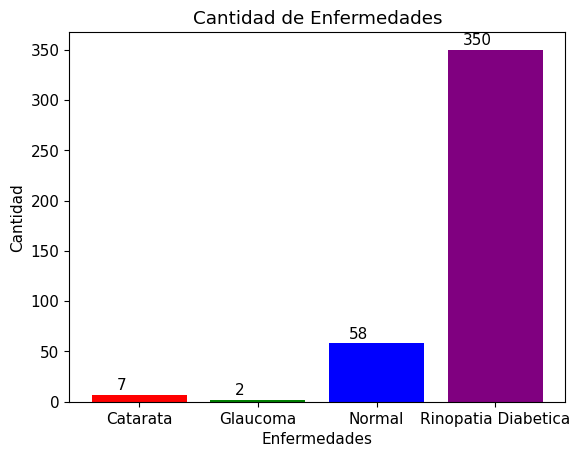

In [ ]:
#realizamos el grafico de barras de las 418 imagenes empleadas

import matplotlib.pyplot as plt
%matplotlib inline

# Datos
enfermedades = ["Catarata", "Glaucoma", "Normal", "Rinopatia Diabetica"]
cantidad = [7, 2, 58, 350]

# Crear gráfico de barras
bars = plt.bar(enfermedades, cantidad, color=['red', 'green', 'blue', 'purple'])

# Agregar etiquetas y título
plt.xlabel('Enfermedades')
plt.ylabel('Cantidad')
plt.title('Cantidad de Enfermedades')

# Agregar cantidades sobre las barras
for bar, count in zip(bars, cantidad):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 5, str(count), ha='center')

# No es necesario plt.show() en Colab, pero puedes incluirlo si lo prefieres
plt.show()

